## Генерация данных:

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib

class Gen_data:
    def __init__ (self, func, ydown_scale, yup_scale ):
        # Data for train
        x_train = torch.rand(700)
        x_train = x_train * 40.0 - 20.0
        
        self.x_train = x_train[ (x_train <= -4) | (x_train >= 4) ] 
        self.y_train = func(self.x_train)
        
        # Validate data
        self.x_val = torch.linspace(-60, 60, 600)
        self.y_val = func(self.x_val)
        
        # For correct view plottig data
        self.ydown_scale = ydown_scale
        self.yup_scale   = yup_scale

    
    def get_train_unsqueeze(self):
        return torch.unsqueeze(self.x_train, 1), torch.unsqueeze(self.y_train, 1)
    
    def get_val_unsqueeze(self):
        return torch.unsqueeze(self.x_val, 1), torch.unsqueeze(self.y_val, 1)

## y=x

Text(0, 0.5, '$y$')

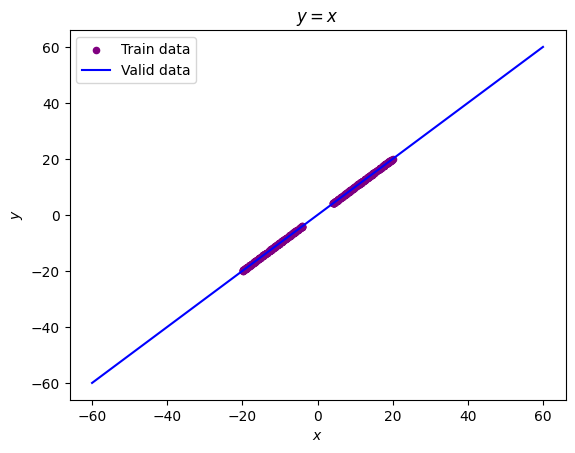

In [2]:
# matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

# Define function
line_func=torch.clone
line_data=Gen_data(line_func, -65,65)

# generate data
x_line_train = line_data.x_train
y_line_train = line_data.y_train

x_line_val = line_data.x_val
y_line_val = line_data.y_val

# Plot data
# plt.plot(x_line_train.numpy(), y_line_train.numpy(), 'o')
plt.scatter(x_line_train.numpy(), y_line_train.numpy(), s=20, color = "purple", label='Train data')
plt.plot(x_line_val,y_line_val, 'b-', label='Valid data')
plt.title('$y = x$');

plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

## sin()

Text(0, 0.5, '$y$')

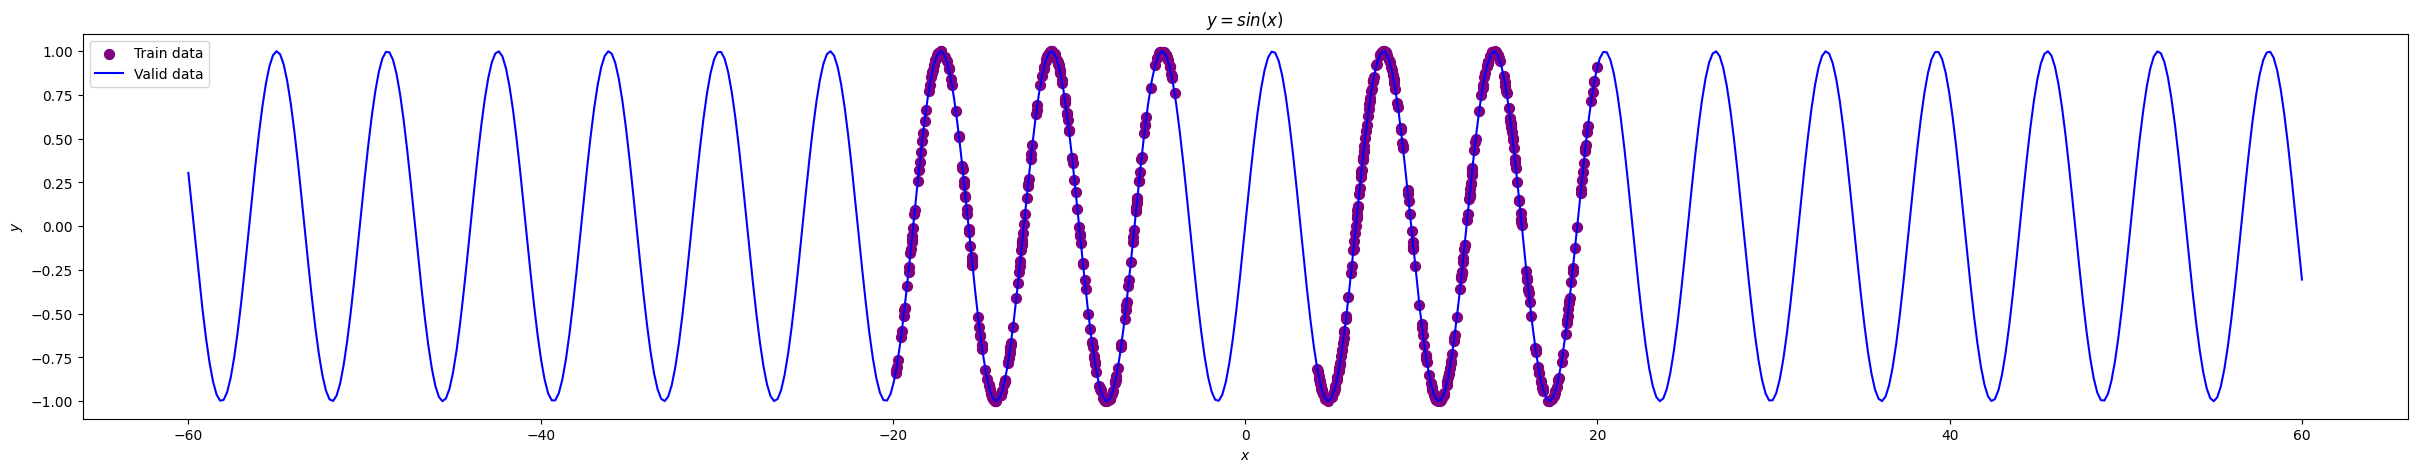

In [3]:
matplotlib.rcParams['figure.figsize'] = (30.0, 5.0)

# Define function
sin_data = Gen_data(torch.sin, -4,4)

# generate data
x_sin_train= sin_data.x_train
y_sin_train = sin_data.y_train

x_sin_val = sin_data.x_val
y_sin_val = sin_data.y_val

# Plot data
plt.scatter(x_sin_train.numpy(), y_sin_train.numpy(), s=50, color = "purple", label='Train data')
plt.plot(x_sin_val,y_sin_val, 'b-', label='Valid data')
plt.title('$y = sin(x)$')

plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

## y=tanh(x)

Text(0, 0.5, '$y$')

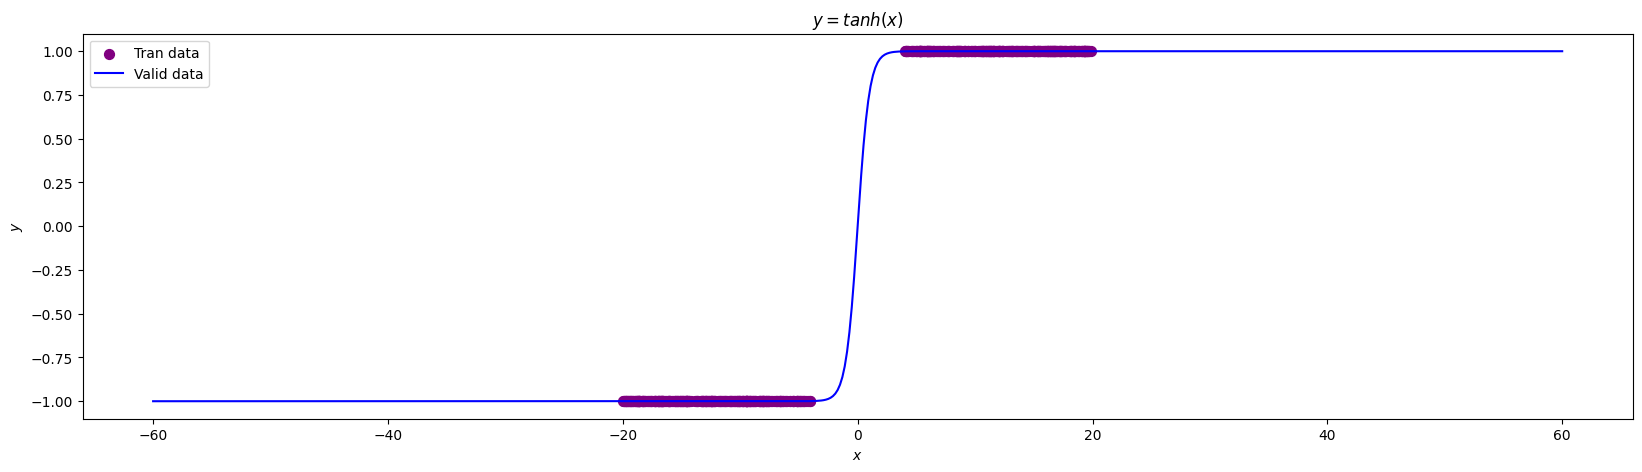

In [4]:
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

# Define function
tanh_data = Gen_data(torch.tanh, -2,2)

# generate data
x_tanh_train= tanh_data.x_train
y_tanh_train = tanh_data.y_train

x_tanh_val = tanh_data.x_val
y_tanh_val = tanh_data.y_val

# Plot data
plt.scatter(x_tanh_train.numpy(), y_tanh_train.numpy(), s=50, color = "purple",  label='Tran data')
plt.plot(x_tanh_val,y_tanh_val, 'b-',  label='Valid data')
plt.title('$y = tanh(x)$');

plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

## y=(x)**2

Text(0, 0.5, '$y$')

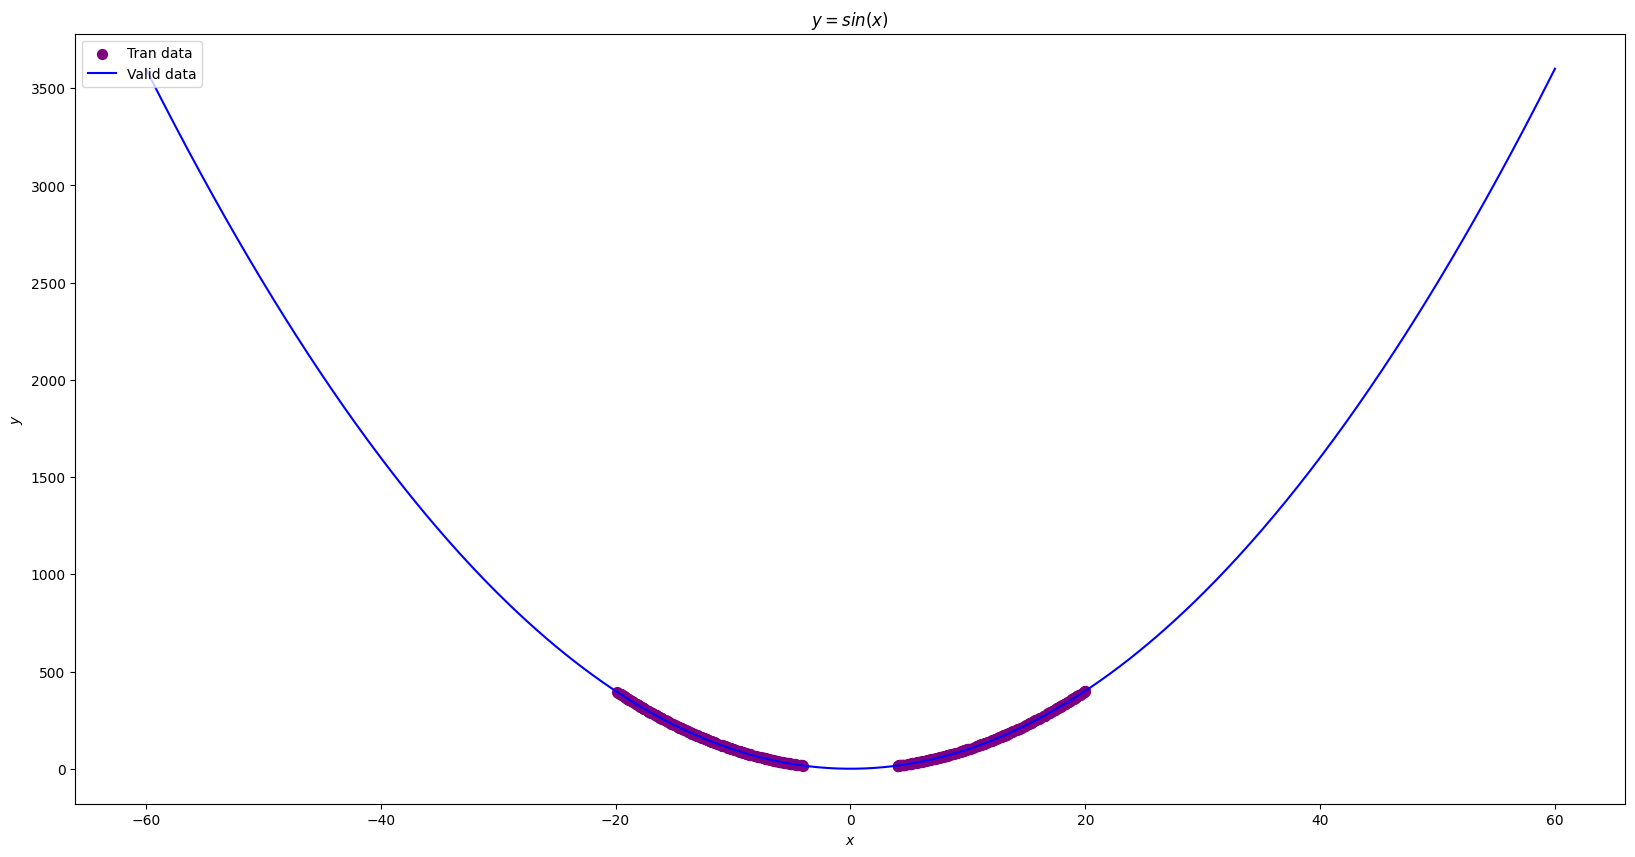

In [5]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Define function
def parabola(x_input):
    return torch.pow(x_input, 2)

parb_data = Gen_data(parabola,-20,400)

# generate data
x_parb_train= parb_data.x_train
y_parb_train = parb_data.y_train

x_parb_val = parb_data.x_val
y_parb_val = parb_data.y_val

# Plot data
plt.scatter(x_parb_train.numpy(), y_parb_train.numpy(), s=50, color = "purple",  label='Tran data')
plt.plot(x_parb_val,y_parb_val, 'b-',   label='Valid data')
plt.title('$y = sin(x)$');

plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [6]:
import torch.nn as nn

class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        # YOUR CODE HERE
        self.fc1 = nn.Linear(1, n_hidden_neurons)
        self.act_relu = nn.ReLU() 
        self.fc2 = nn.Linear(n_hidden_neurons, 1)
        pass

    def forward(self, x):
        x = self.fc1(x)
        x = self.act_relu(x)
        x = self.fc2(x)
        return x


def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

## Data for input => nn to train 

In [7]:
# sin_data
# tanh_data
# parb_data

x_line_train_nn,y_line_train_nn=line_data.get_train_unsqueeze()
x_sin_train_nn,y_sin_train_nn=sin_data.get_train_unsqueeze()
x_tanh_train_nn,y_tanh_train_nn=tanh_data.get_train_unsqueeze()
x_parb_train_nn,y_parb_train_nn=parb_data.get_train_unsqueeze()

## Plot func

In [8]:
from IPython.display import clear_output


def predict_plot(net, data, path_save=None, epoch="final") :
    x_val, y_val = data.get_val_unsqueeze()
    net.eval()
    y_pred = net.forward(x_val)
    net.train()
    
    x_val = data.x_val
    y_val = data.y_val
    
    # Ограничение координат где будет отображаться картинка

    plt.xlim(-65, 65)
    plt.ylim(data.ydown_scale, data.yup_scale)
    
    plt.plot(x_val, y_val, 'b-', label='Groud truth')
    plt.scatter(x_val, y_pred.data, s=5, color = "r", label='Model predict')
    # plt.plot(x_val, y_pred.data.numpy(), 'o', c='r', label='Prediction');
    
    # Green zone
    plt.axvspan(-20, -4, alpha=0.2, color='green', label='Train data zone')
    plt.axvspan(4, 20, alpha=0.2, color='green')
    
    plt.legend(title = f"Epoch = {epoch}", loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
    if path_save!=None:        
        plt.savefig(path_save)
        plt.show() 
        
        plt.clf()
        plt.close('all')
        clear_output(wait=True)
        

## Train func

In [9]:
import subprocess

def ffmpeg_img2video(pth):
    process = subprocess.Popen(["ffmpeg", "-framerate", "1", "-pattern_type", "glob", "-i", f"{pth}/*.png", "-c:v", "libx264",  os.path.join(pth,'out.mp4') ], stdout=subprocess.PIPE) # "-pix_fmt", "yuv420p",
    code = process.wait()
    data = process.communicate()[0]

### Создание из картинок видео

In [10]:
import cv2
import numpy as np
import glob

def cv2_imgs2vid(path):
    # img_array = []
    images=sorted(glob.glob(f"{path}/*.png"))
    height, width, layers=cv2.imread(images[0]).shape
    size = (width,height)
    
    out = cv2.VideoWriter(os.path.join(path,"out.mp4"),cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
    
    for filename in images:
        img = cv2.imread(filename)
        out.write(img)
    out.release()

### Получение метрики MSE

In [11]:
import torch.nn as nn

def evaluate_MSE(data, n_net):
    loss = nn.MSELoss()
    n_net.eval()
    
    # x_train,y_train=data.get_train_unsqueeze()
    # y_pred = n_net.forward(x_train)
    # mse_train = loss(x_train, y_pred)
    
    x_val,y_val=data.get_val_unsqueeze()
    y_pred = n_net.forward(x_val)
    mse_val = loss(y_val, y_pred)
    
    n_net.train()
    return mse_val

### Отрисовка метрики MSE

In [12]:
def plot_MSE(dict_mse):
    print(f"best MSE train {round(min(dict_mse['mse_train']),5)}")
    print(f"best MSE val   {round(min(dict_mse['mse_val'])  ,5)}")

    plt.plot(list(range(len(dict_mse['mse_train']))),dict_mse['mse_train'], 'r-', label='MSE train')
    plt.plot(list(range(len(dict_mse['mse_val']))),dict_mse['mse_val'], 'b-', label='MSE val')
    plt.legend(loc='upper left')
    plt.show()

In [13]:
import copy
import os
import numpy as np
import torch
import random

torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

def train(data, nnet, epochs=100, path_save=None, freq=100, lr= 0.001 ): # -> trained nn model # n_hidden_neurons = 512
    
    optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)
    x_train,y_train = data.get_train_unsqueeze()
    
    dict_mse={"mse_train":[],"mse_val":[]}
    nnet.train()
    best_mse_val= float('inf')
    best_mse_train= float('inf')
    mse_val= float('inf')
    
    
    # global amount_best
    # amount_best=0
    for epoch_index in range(epochs):
        y_pred = nnet.forward(x_train)
        loss_train = loss(y_pred, y_train)

        
        if path_save!=None and epoch_index%freq==0:
            img_pth=os.path.join(path_save,f"{str(epoch_index).zfill(7)}.png")
            print(epoch_index, end='\r')
            predict_plot(nnet, data, img_pth, epoch_index)
            
        # if epoch_index%5==0:
        mse_val=evaluate_MSE(data, nnet)
        dict_mse["mse_train"].append(float(loss_train))
        dict_mse["mse_val"].append(float(mse_val))
            
        if float(mse_val) < best_mse_val:
            best_mse_val = float(mse_val)
            nnet_best_val = copy.deepcopy(nnet)
            best_epoch_val = epoch_index
            # amount_best+=1
            
        if float(loss_train) < best_mse_train:
            best_mse_train = float(loss_train)
            nnet_best_train = copy.deepcopy(nnet)
            best_epoch_train = epoch_index
            # amount_best+=1
        
        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()
                
    print(f"best_epoch_val   {best_epoch_val}")
    print(f"best_epoch_train {best_epoch_train}") 
    cv2_imgs2vid(path_save) # make video from images
    # n_net_copy = copy.deepcopy(n_net)
    return nnet_best_val, nnet_best_train, dict_mse

## Train on data y=x

best_epoch_val   199
best_epoch_train 199


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


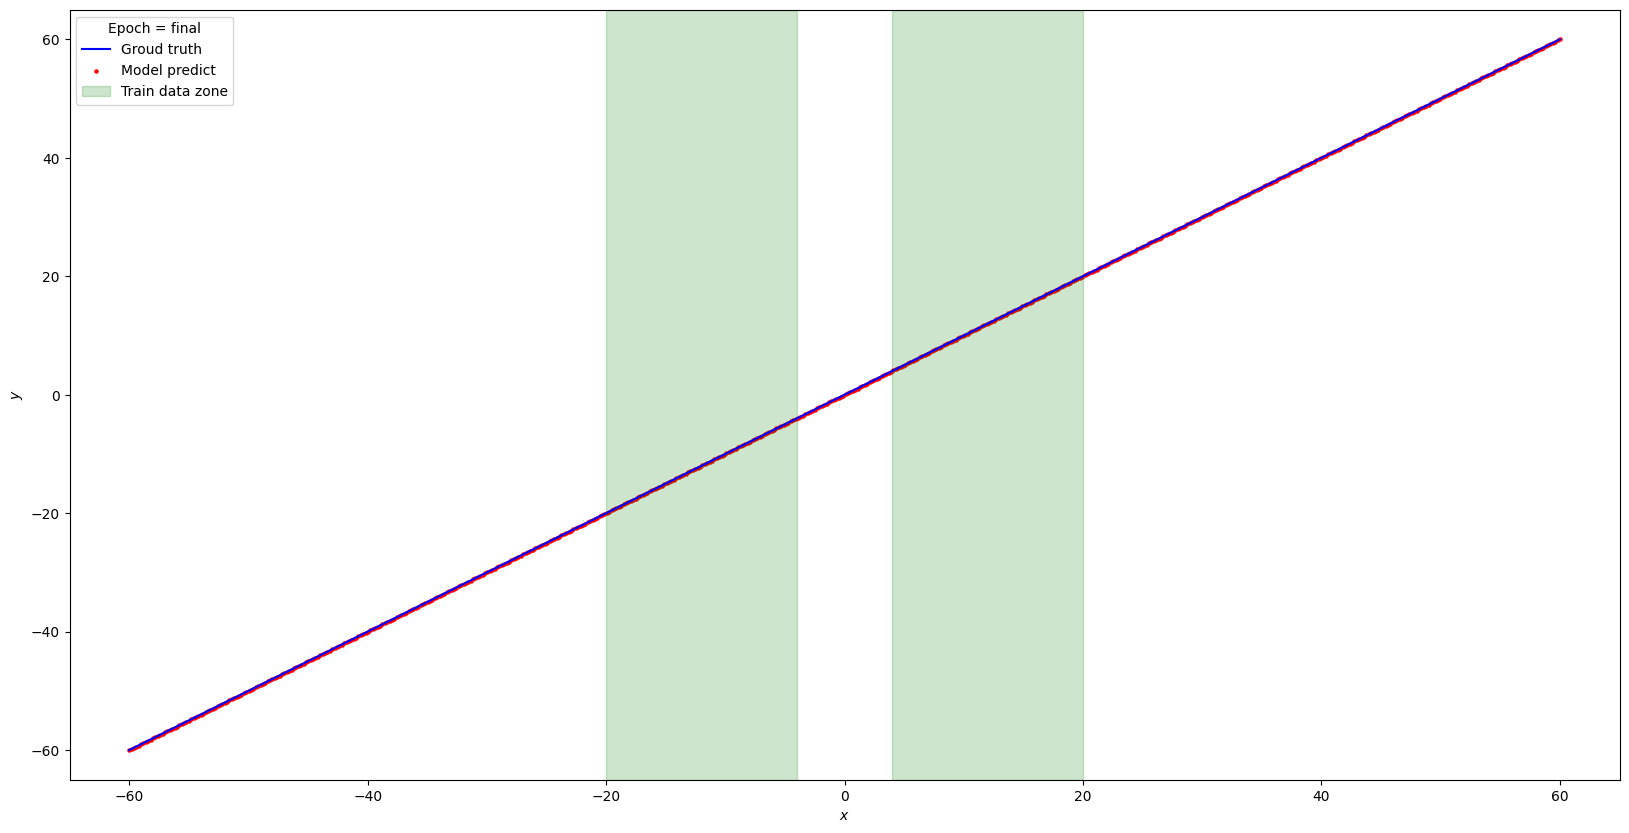

In [17]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)


# 01 class wrapped data
data=line_data

# 02 Neural net for train
n_hidden_neurons=512
nnet = Net(n_hidden_neurons)

# 03 Amount of epoch
epochs=200

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/001_line_func_relu/"

# 05 How often write image-graph to file 
freq=10 # how oftet write frames

# 06 Learning rate
lr= 0.01



# TRAIN RUN
nnet_line_bestval, nnet_line_besttrain, dict_mse =train(data, nnet, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_line_bestval, data)


# # TRAIN RUN
# nnet_line, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

# ## Plot model
# matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
# predict_plot(nnet_line, line_data)

Best train model


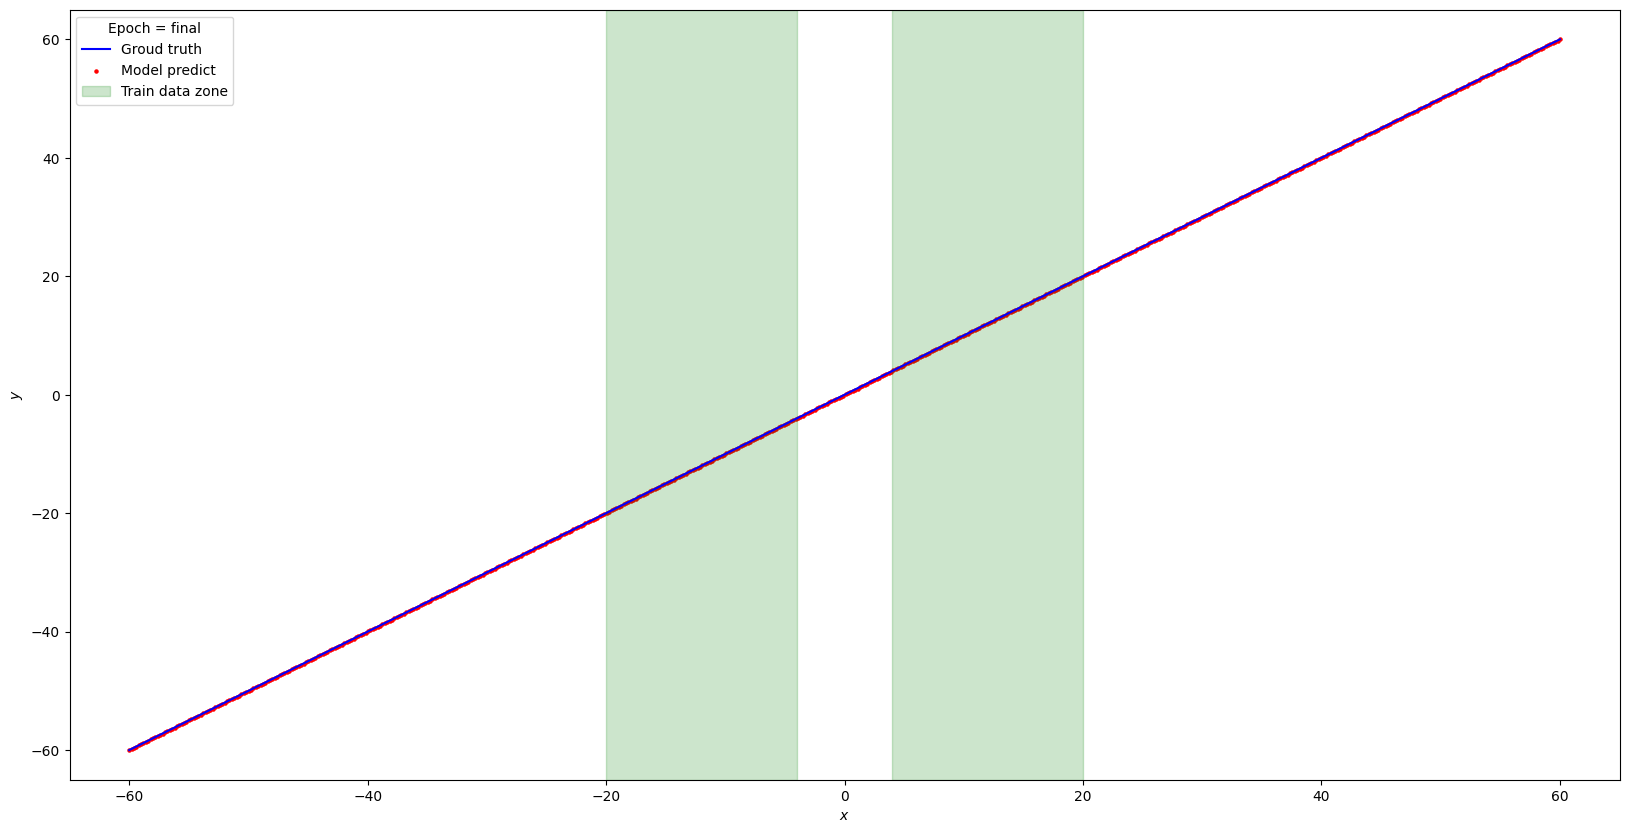

In [15]:
print("Best train model")
predict_plot(nnet_line_besttrain, data)

best MSE train 1e-05
best MSE val   0.00024


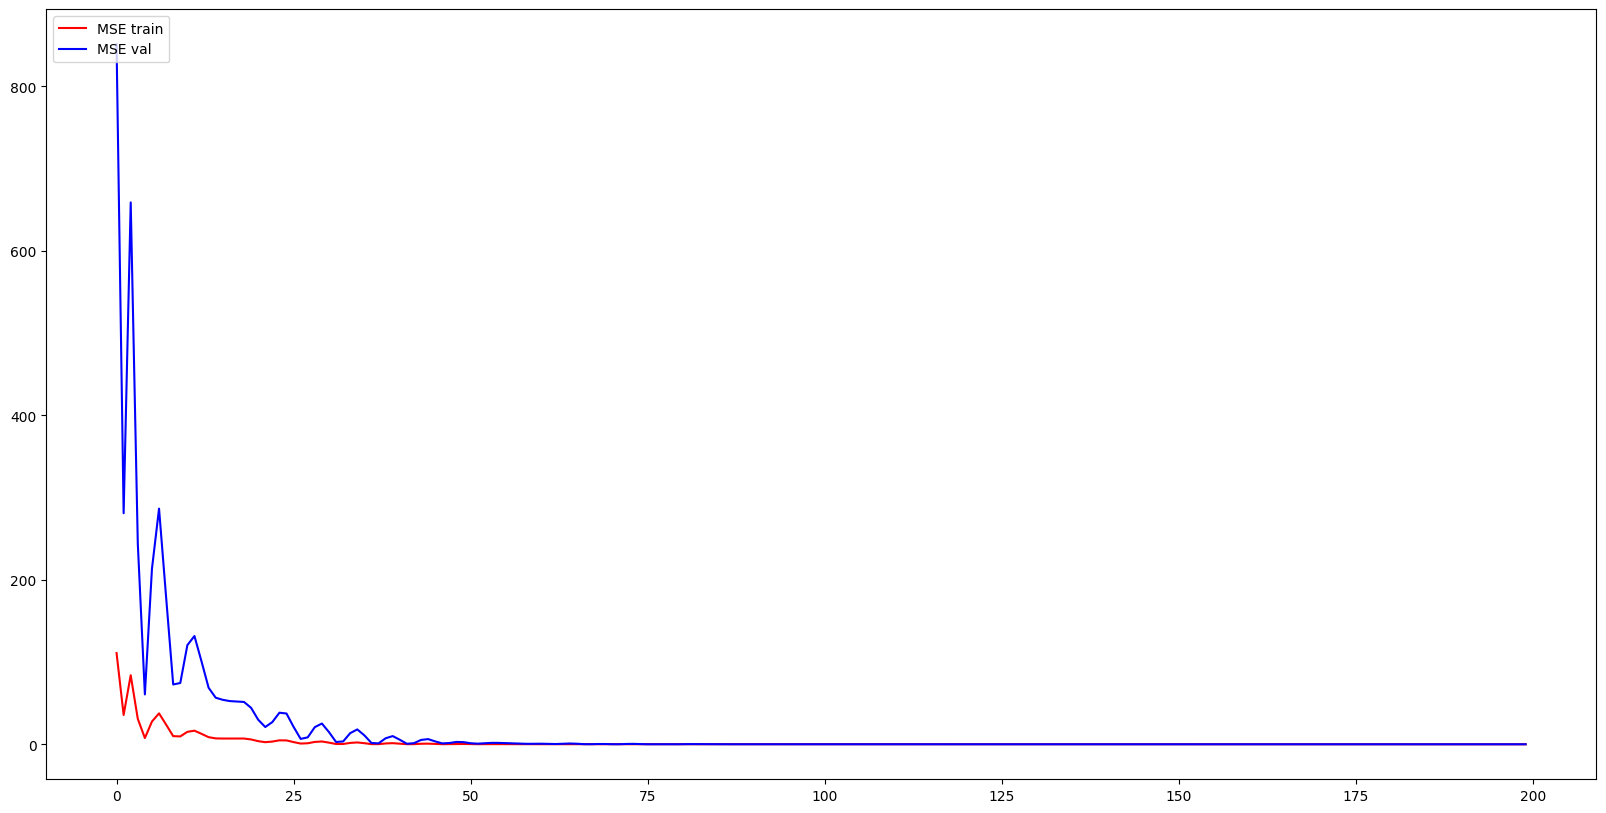

In [18]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=sin(x)

best_epoch_val   105
best_epoch_train 14914


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


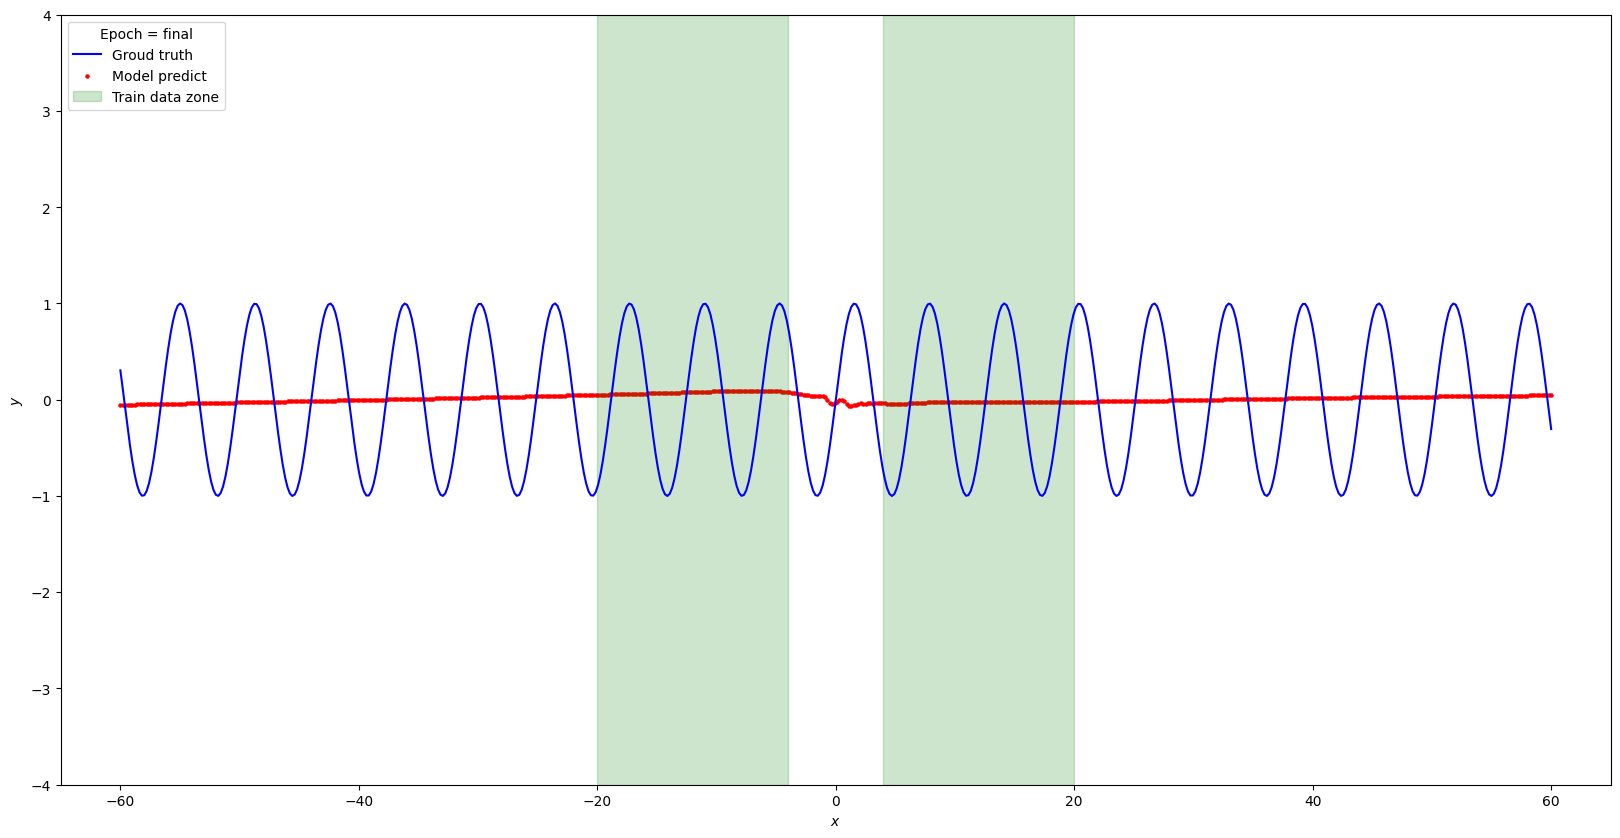

In [19]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=sin_data

# 02 Neural net for train
n_hidden_neurons=512
n_net = Net(n_hidden_neurons)

# 03 Amount of epoch
epochs=15000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/002_sin_func_relu/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.01


# TRAIN RUN
nnet_sin_bestval, nnet_sin_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_sin_bestval, data)

Best train model


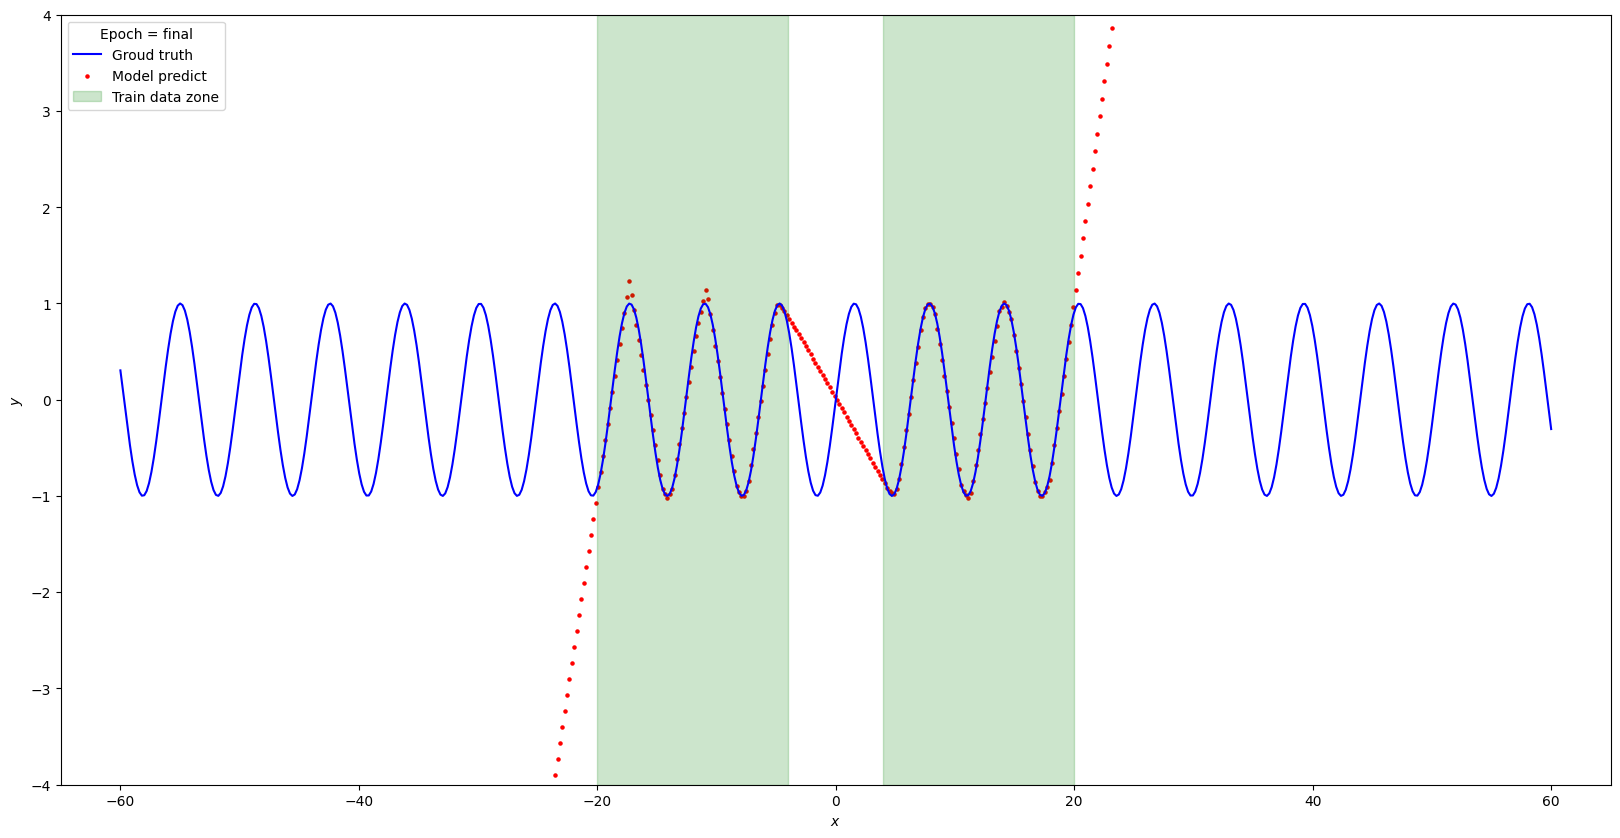

In [20]:
print("Best train model")
predict_plot(nnet_sin_besttrain, data)

best MSE train 0.00206
best MSE val   0.49721


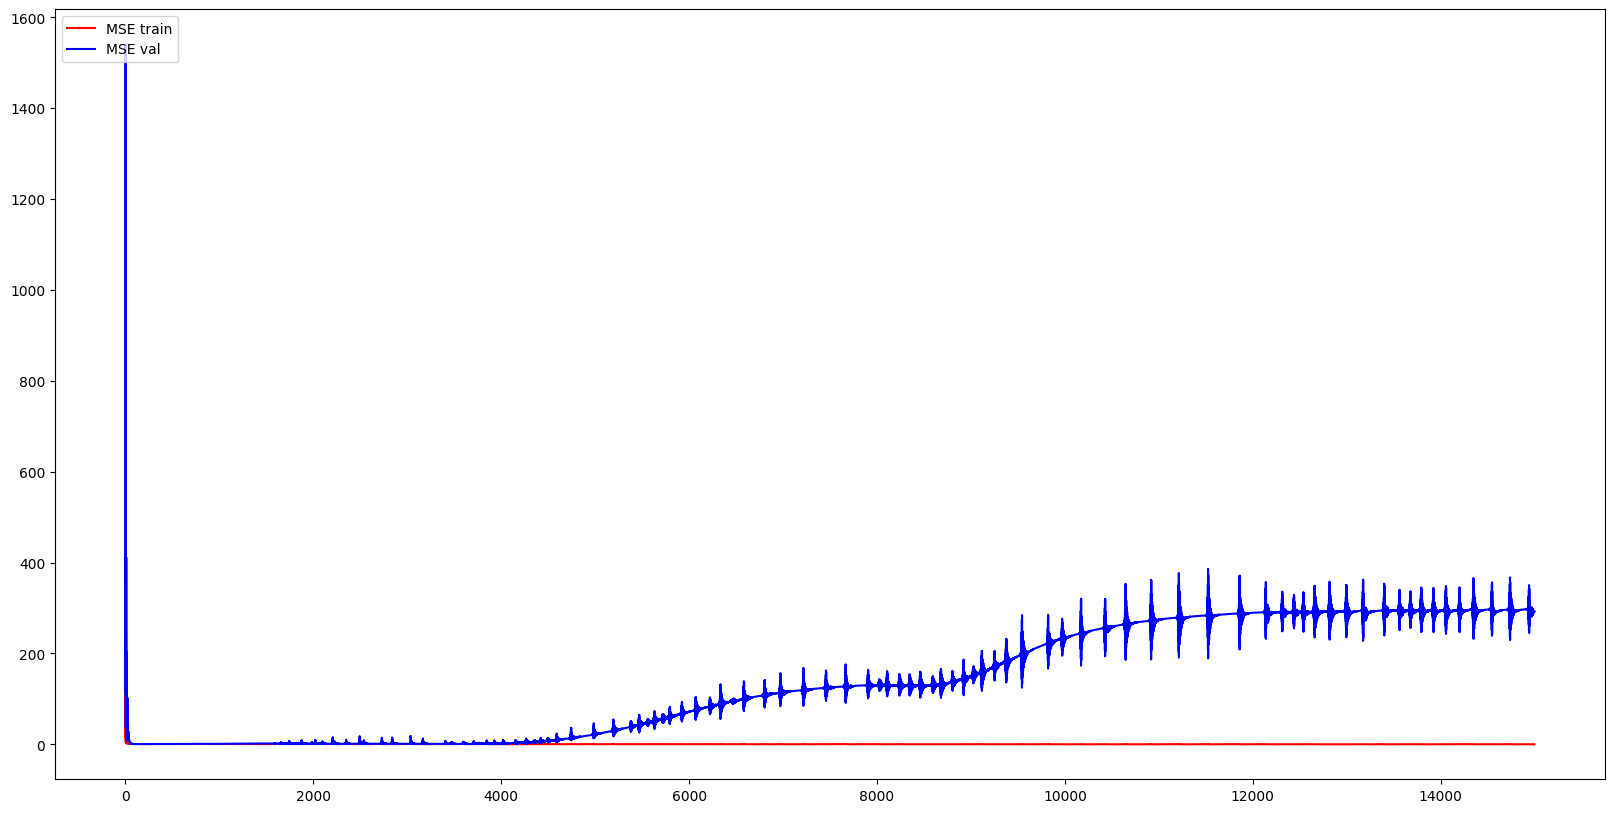

In [21]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=tanh(x)

best_epoch_val   399
best_epoch_train 399


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


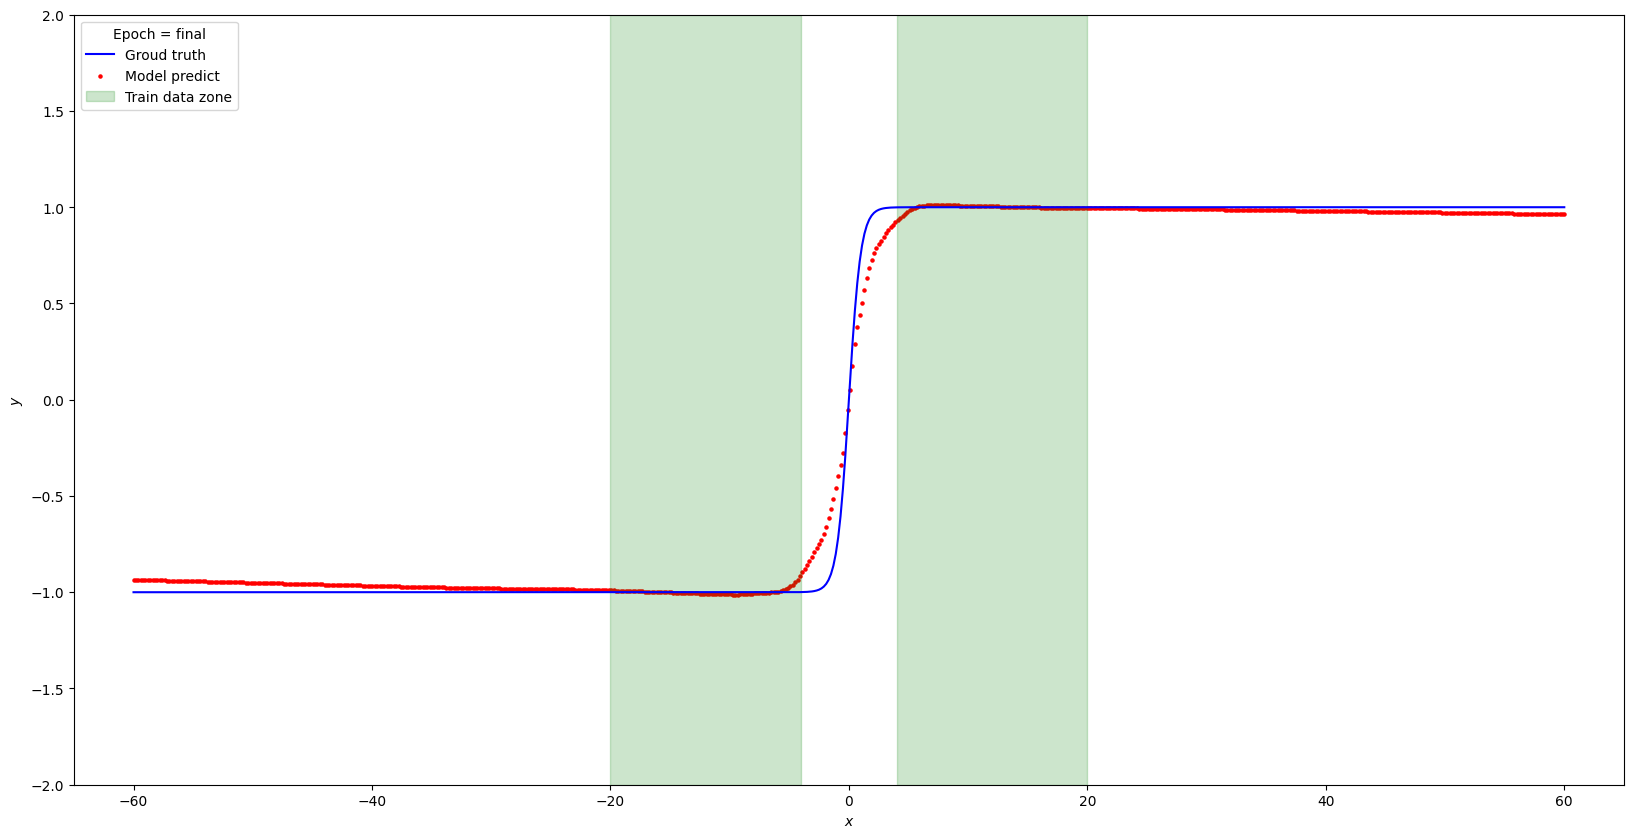

In [28]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=tanh_data

# 02 Neural net for train
n_hidden_neurons=512
n_net = Net(n_hidden_neurons)

# 03 Amount of epoch
epochs=400

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/003_tanh_func_relu/"

# 05 How often write image-graph to file 
freq=20

# 06 Learning rate
lr= 0.001



nnet_tanh_bestval, nnet_tanh_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_tanh_bestval, data)


Best train model


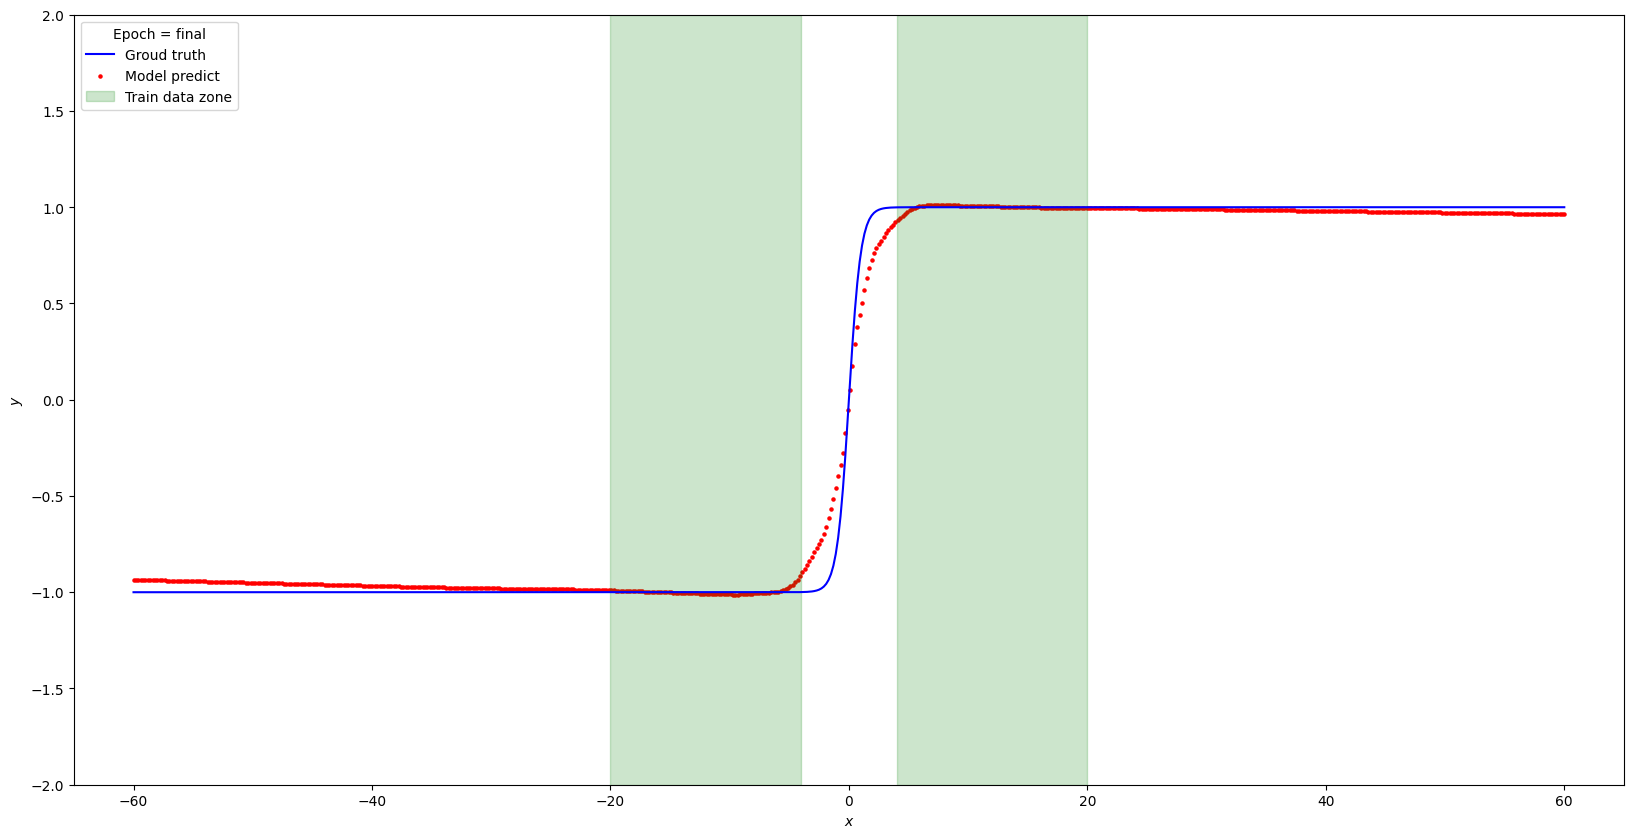

In [29]:
print("Best train model")
predict_plot(nnet_tanh_besttrain, data)

best MSE train 0.00018
best MSE val   0.00391


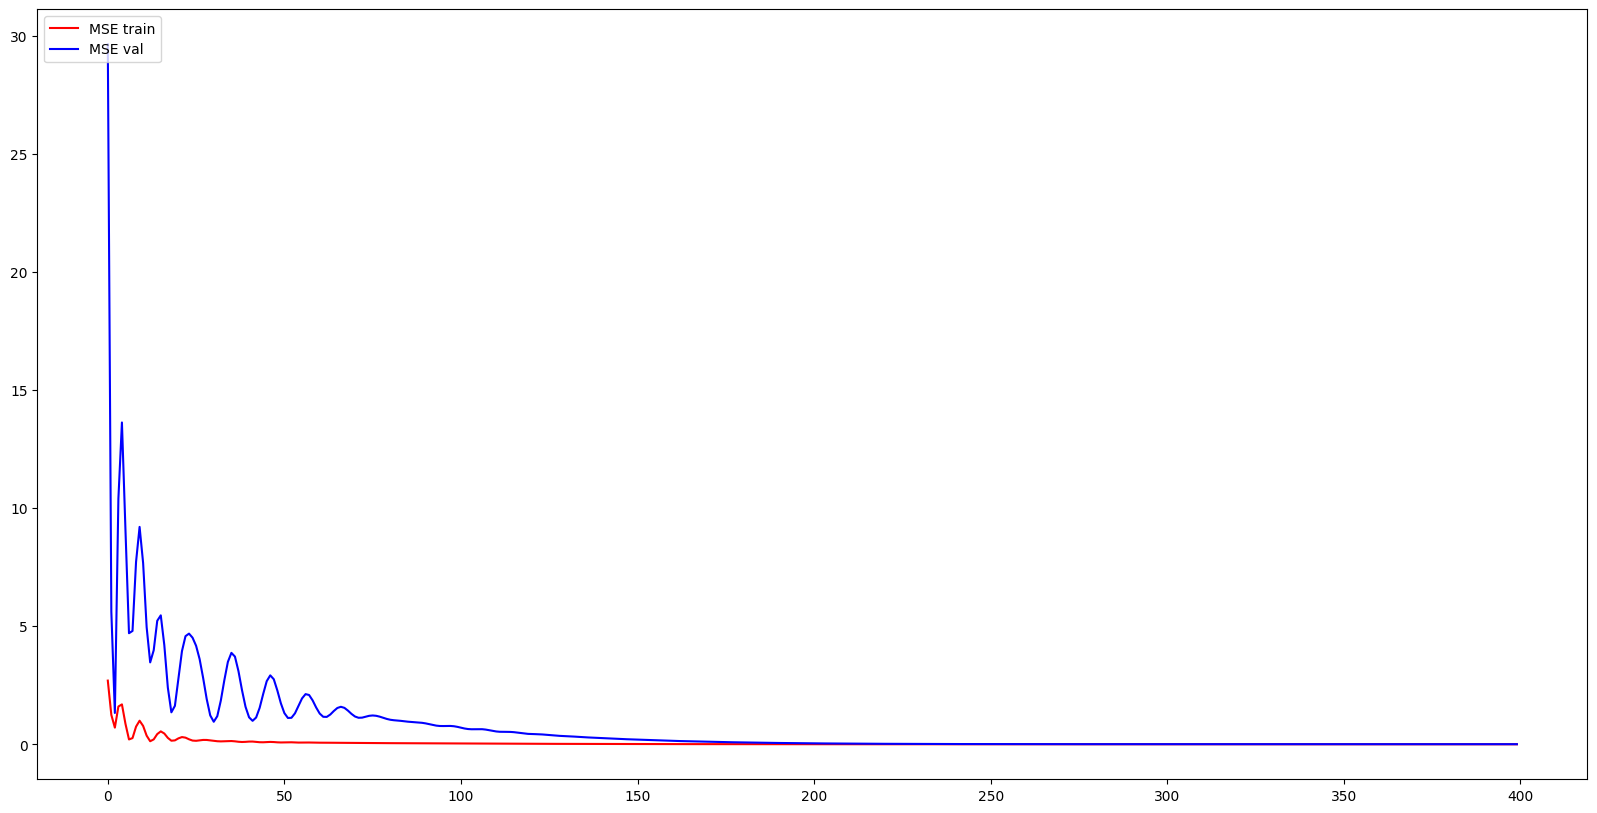

In [30]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=x^2

best_epoch_val   9999
best_epoch_train 9999


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


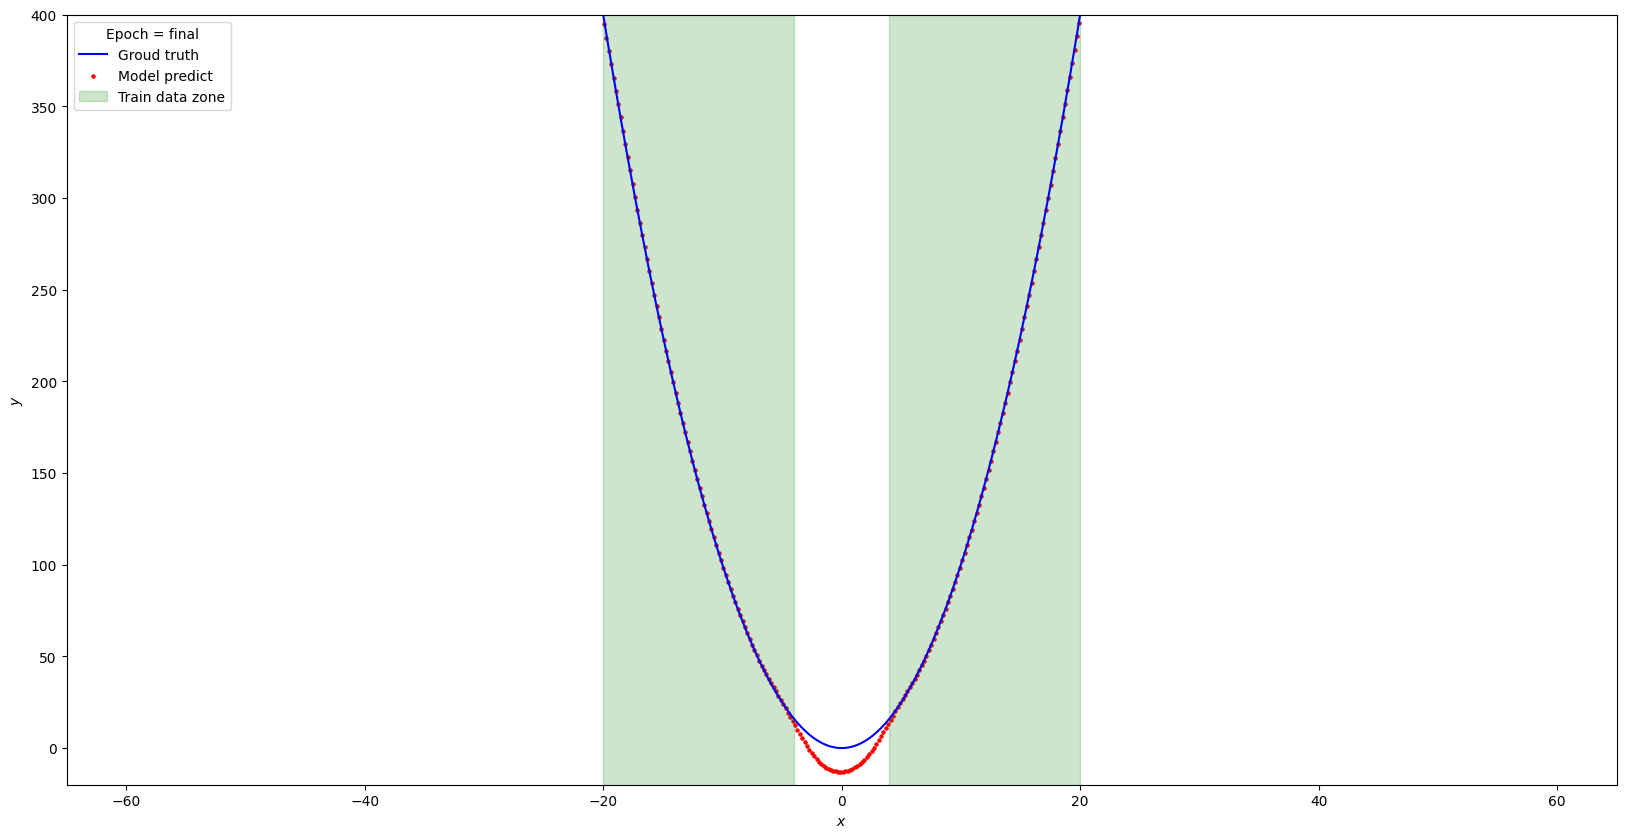

In [31]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=parb_data

# 02 Neural net for train
n_hidden_neurons=512
n_net = Net(n_hidden_neurons)

# 03 Amount of epoch
epochs=10000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/004_parab_func_relu/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.001


# TRAIN RUN
nnet_parb_bestval, nnet_parb_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_parb_bestval, data)

Best train model


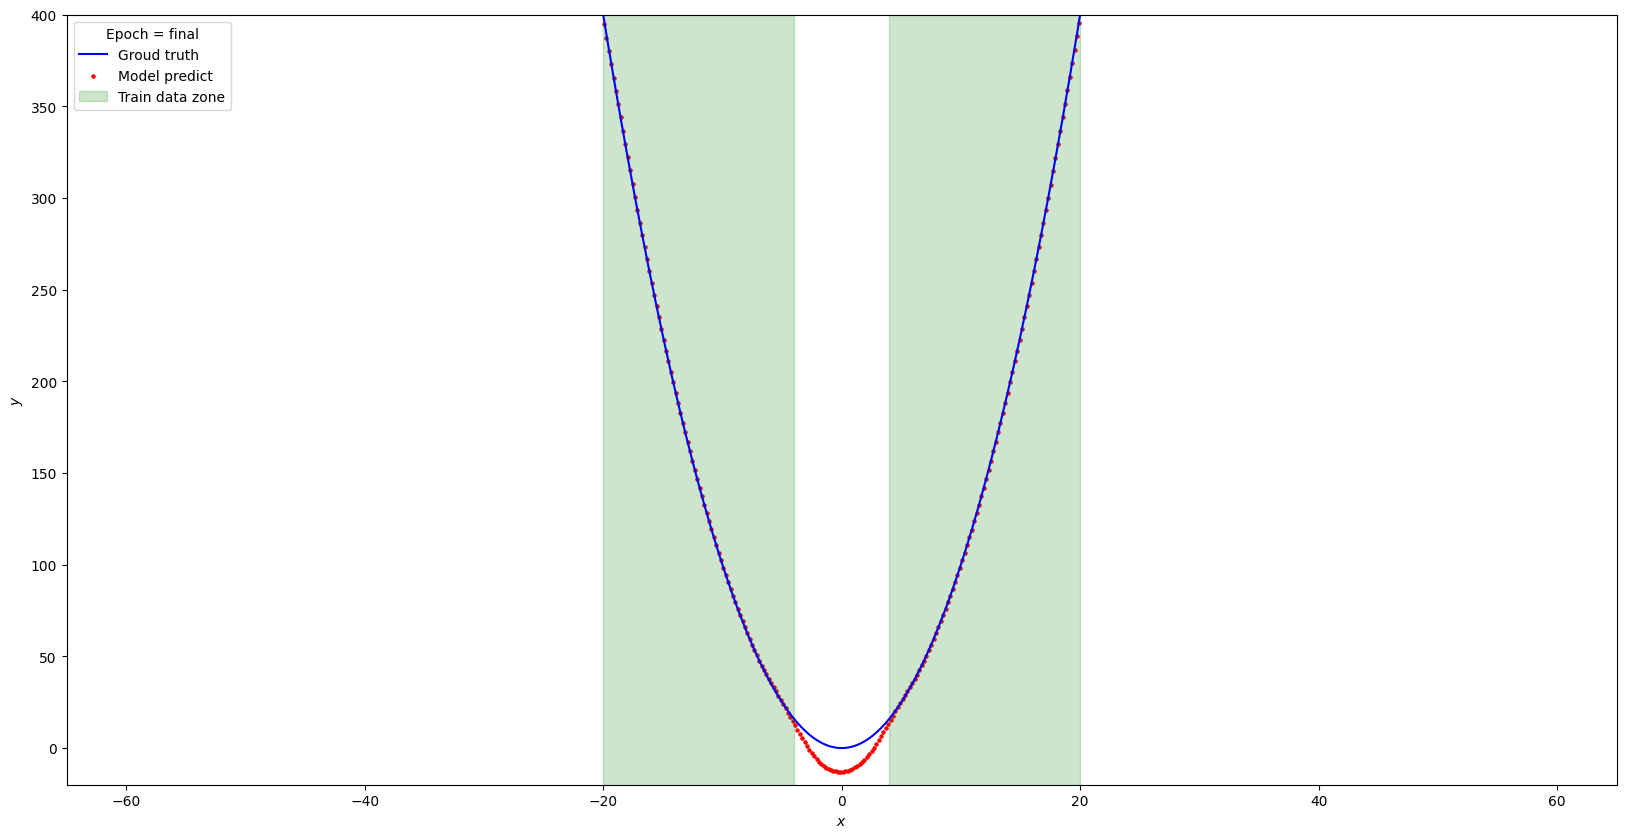

In [32]:
print("Best train model")
predict_plot(nnet_parb_besttrain, data)

best MSE train 0.21265
best MSE val   429552.75


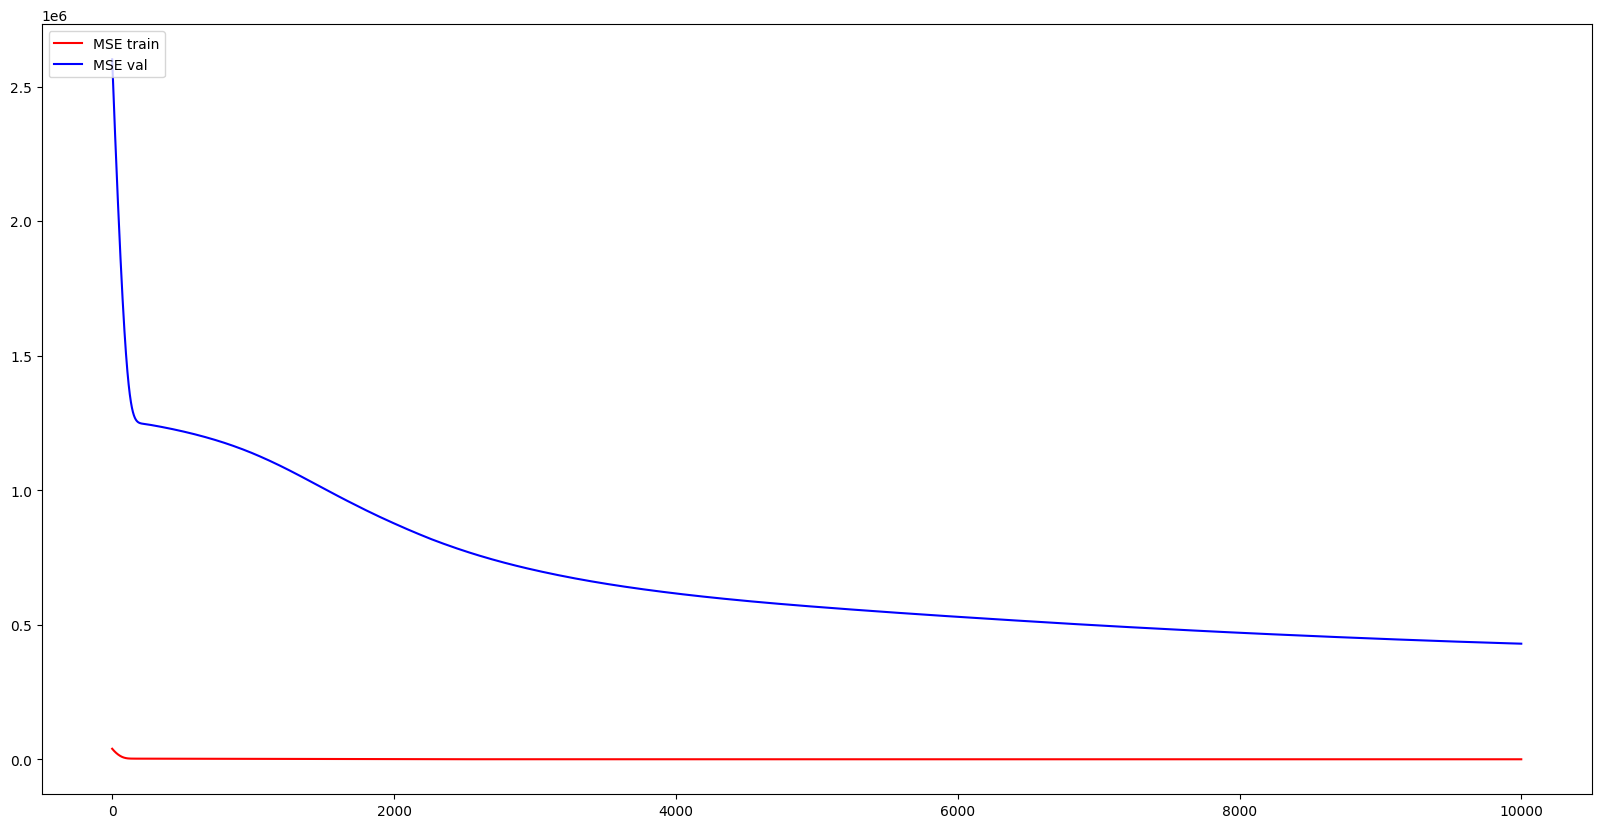

In [33]:
## Plot metric
plot_MSE(dict_mse)

## init snake func activation

In [34]:
import torch 
from torch import nn, sin, pow
from torch.nn import Parameter
from torch.distributions.exponential import Exponential

class Snake(nn.Module):
    '''         
    Implementation of the serpentine-like sine-based periodic activation function:
    .. math::
         Snake_a := x + \frac{1}{a} sin^2(ax) = x - \frac{1}{2a}cos{2ax} + \frac{1}{2a}
    This activation function is able to better extrapolate to previously unseen data,
    especially in the case of learning periodic functions

    Shape:
        - Input: (N, *) where * means, any number of additional
          dimensions
        - Output: (N, *), same shape as the input
        
    Parameters:
        - a - trainable parameter
    
    References:
        - This activation function is from this paper by Liu Ziyin, Tilman Hartwig, Masahito Ueda:
        https://arxiv.org/abs/2006.08195
        
    Examples:
        >>> a1 = snake(256)
        >>> x = torch.randn(256)
        >>> x = a1(x)
    '''
    def __init__(self, in_features, a=None, trainable=True):
        '''
        Initialization.
        Args:
            in_features: shape of the input
            a: trainable parameter
            trainable: sets `a` as a trainable parameter
            
            `a` is initialized to 1 by default, higher values = higher-frequency, 
            5-50 is a good starting point if you already think your data is periodic, 
            consider starting lower e.g. 0.5 if you think not, but don't worry, 
            `a` will be trained along with the rest of your model
        '''
        super(Snake,self).__init__()
        self.in_features = in_features if isinstance(in_features, list) else [in_features]

        # Initialize `a`
        if a is not None:
            self.a = Parameter(torch.ones(self.in_features) * a) # create a tensor out of alpha
        else:            
            m = Exponential(torch.tensor([0.1]))
            self.a = Parameter((m.rsample(self.in_features)).squeeze()) # random init = mix of frequencies

        self.a.requiresGrad = trainable # set the training of `a` to true

    def forward(self, x):
        '''
        Forward pass of the function.
        Applies the function to the input elementwise.
        Snake ∶= x + 1/a* sin^2 (xa)
        '''
        return  x + (1.0/self.a) * pow(sin(x * self.a), 2)

## Create neaural snake net

In [35]:
import torch.nn as nn
# from activations_snake import Snake


class SnakeNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons,alpha):
        super().__init__()
        # YOUR CODE HERE
        self.fc1 = nn.Linear(1, n_hidden_neurons)
        self.act_snake = Snake(n_hidden_neurons, alpha) 
        self.fc2 = nn.Linear(n_hidden_neurons, 1)
        pass

    def forward(self, x):
        x = self.fc1(x)
        x = self.act_snake(x)
        x = self.fc2(x)
        return x

    
def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()


## Create train for snake func

## Train on data y=x + snake activation

best_epoch_val   90
best_epoch_train 90


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


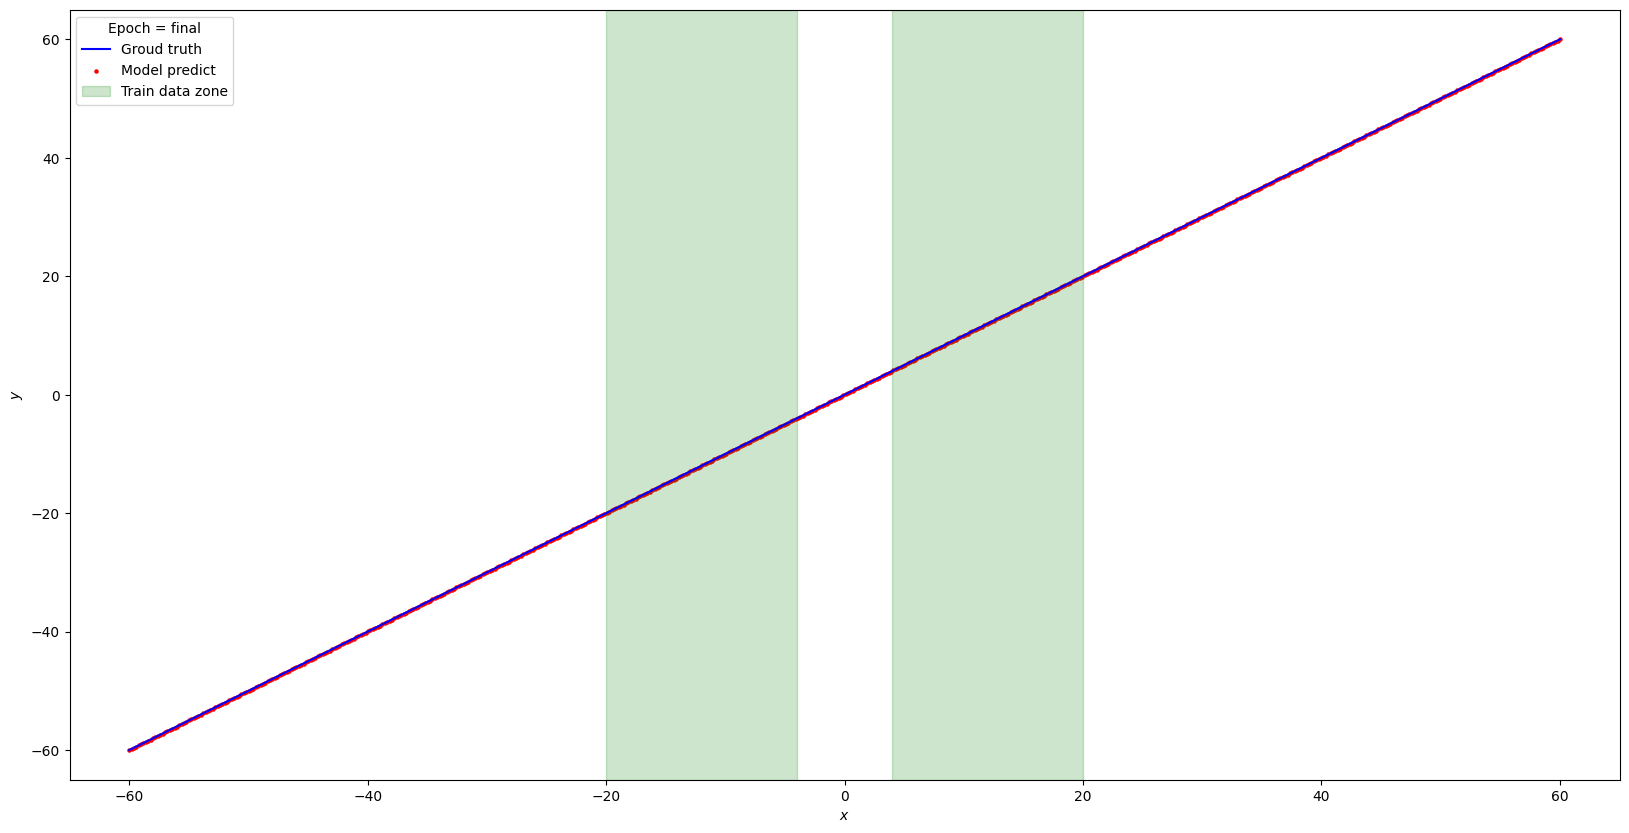

In [38]:
## Train model
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)


# 01 class wrapped data
data=line_data

# 02 Neural net for train
n_hidden_neurons=512
alpha=20
n_net = SnakeNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=100

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/001_line_func_snake/"

# 05 How often write image-graph to file 
freq=10

# 06 Learning rate
lr= 0.001


# TRAIN RUN
nnet_line_bestval, nnet_line_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_line_bestval, data)

Best train model


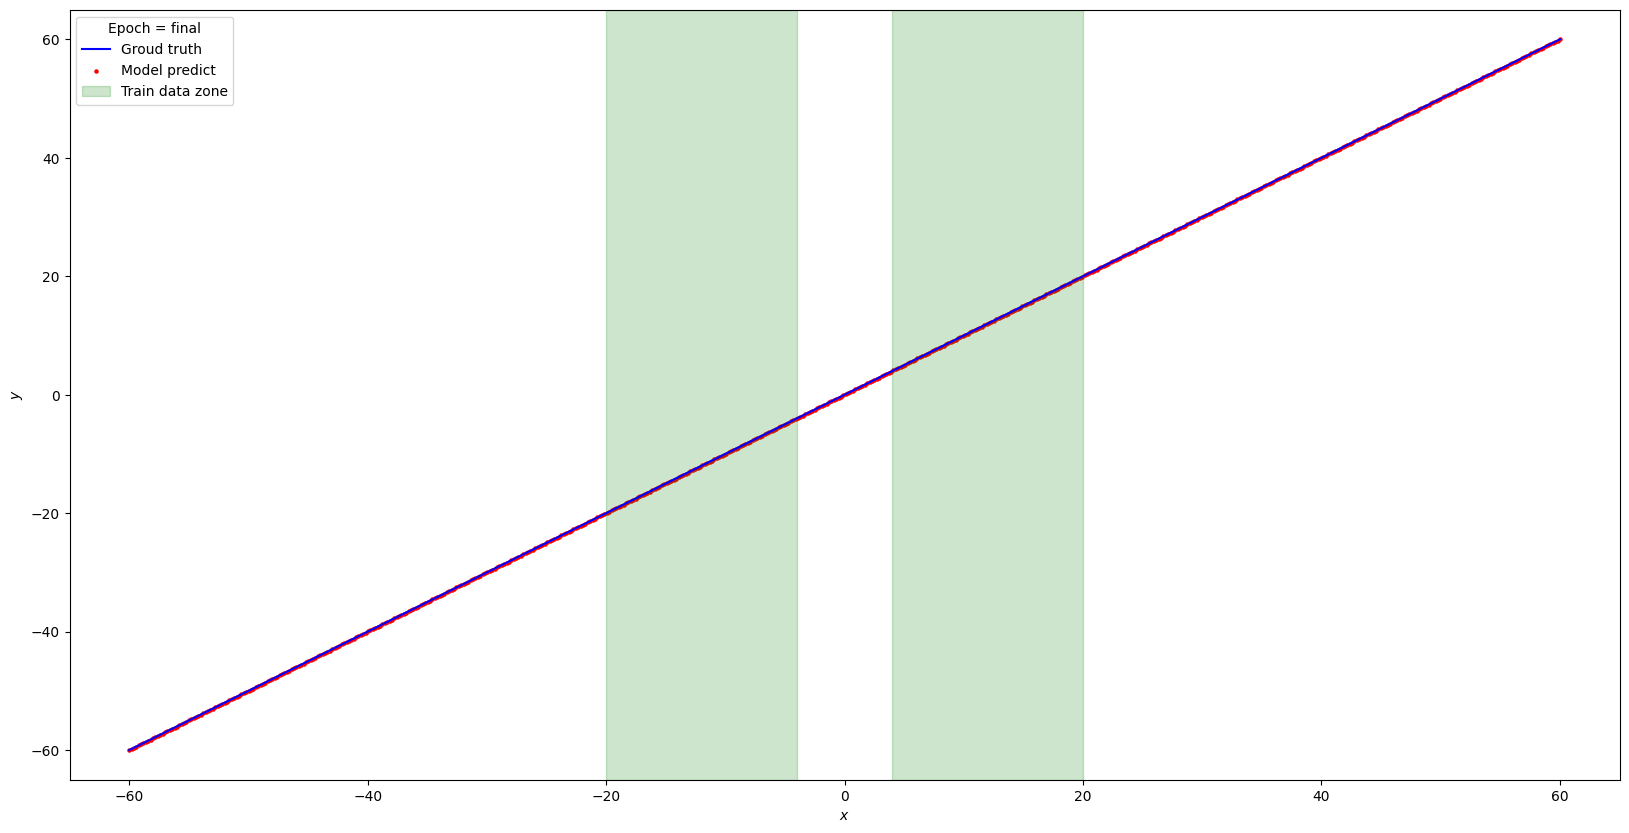

In [39]:
## Plot model
print("Best train model")
predict_plot(nnet_line_besttrain, data)

best MSE train 0.00011
best MSE val   0.00014


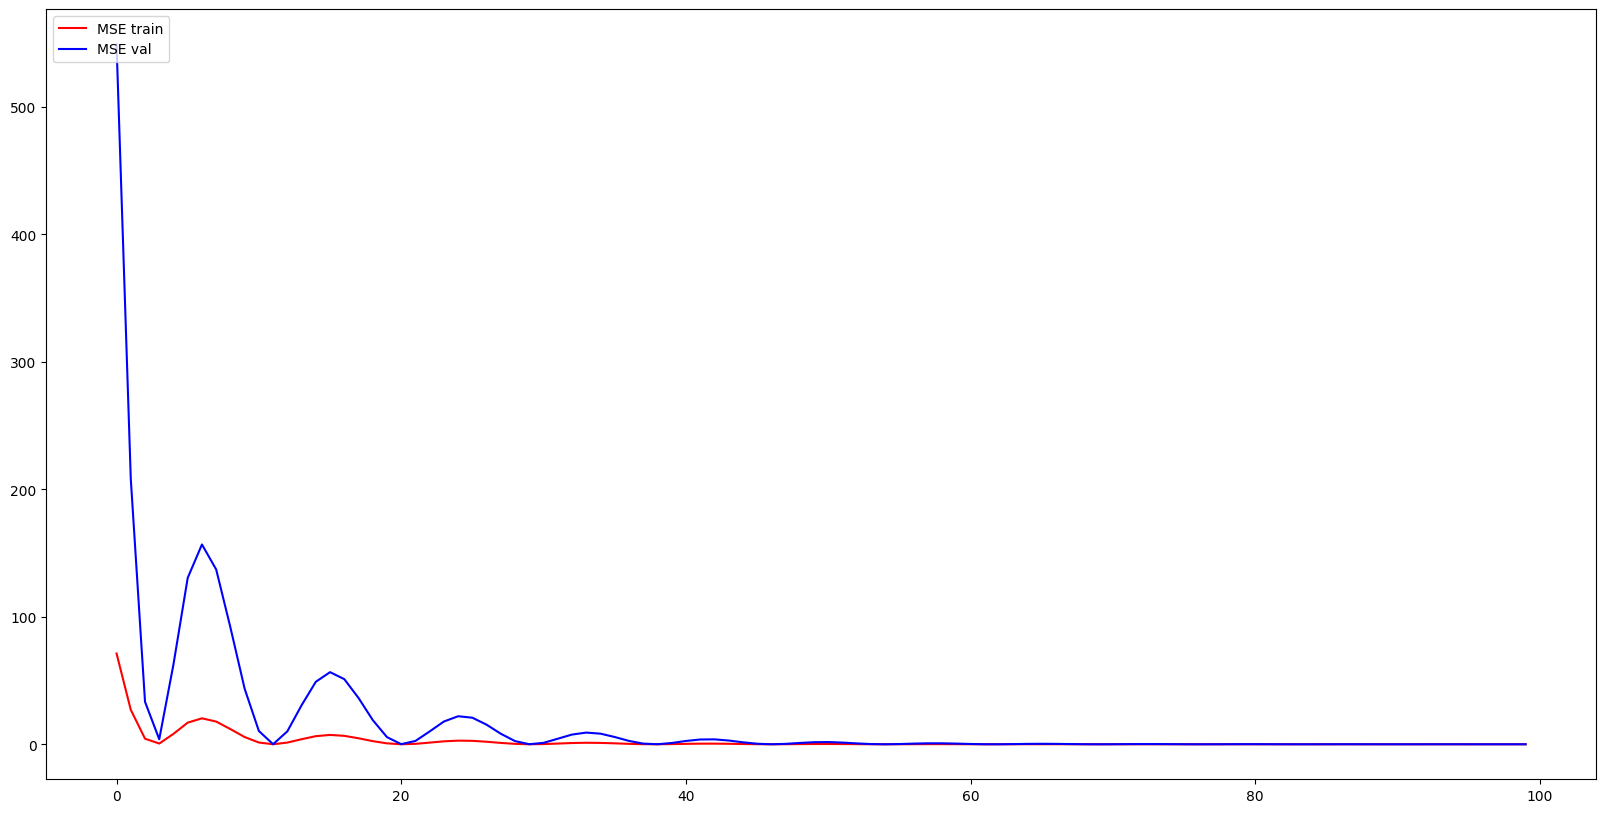

In [40]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=sin(x) + snake activation + snake activation

best_epoch_val   6091
best_epoch_train 19964


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


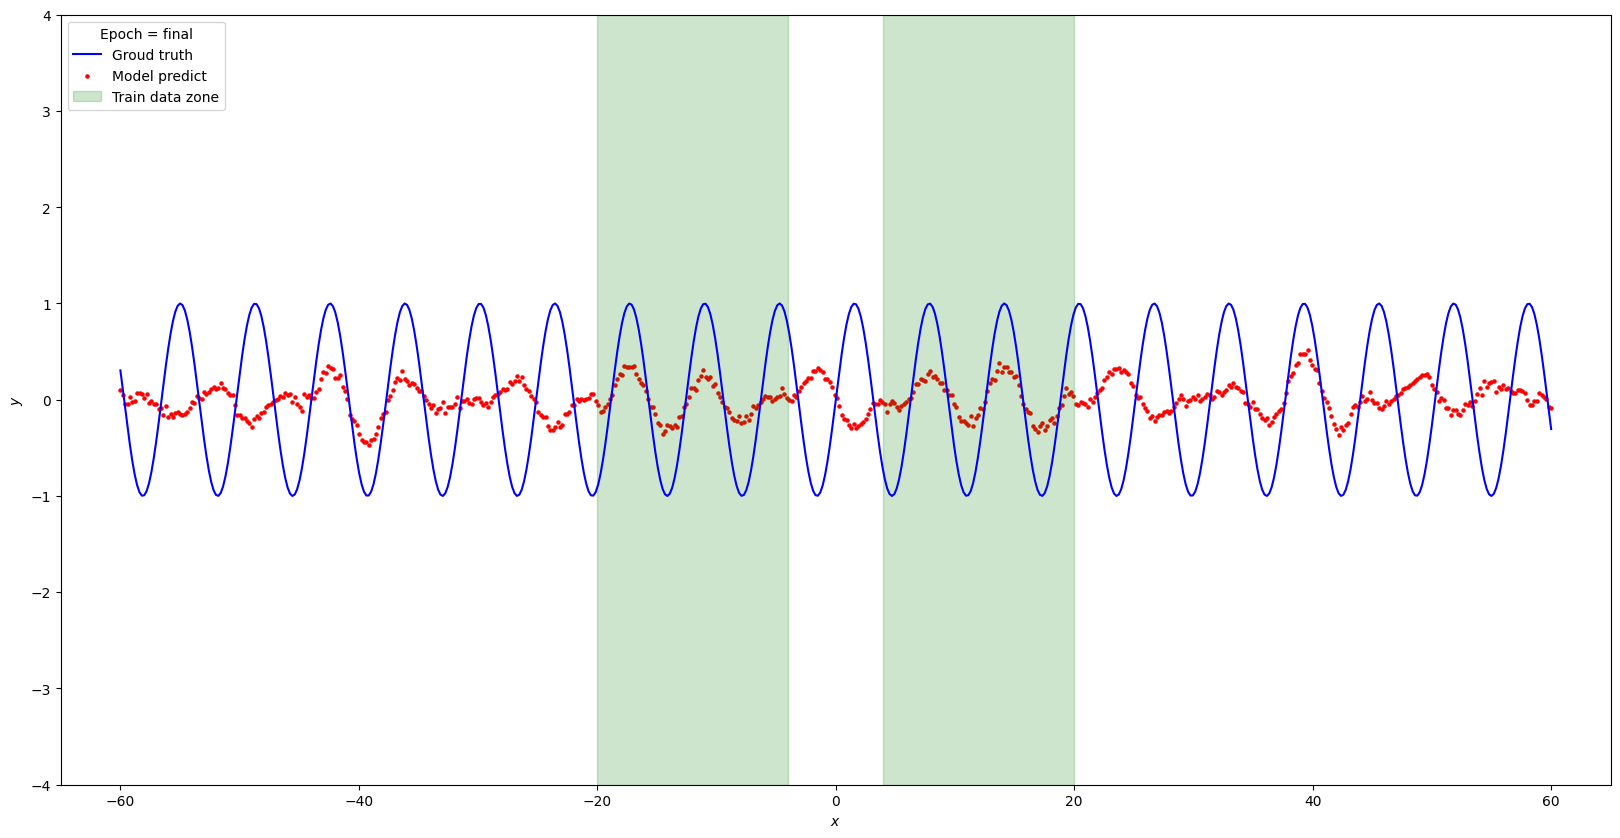

In [41]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)


# 01 class wrapped data
data=sin_data

# 02 Neural net for train
n_hidden_neurons=512
alpha=20
n_net = SnakeNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=20000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/002_sin_func_snake_500hiden_20000epch_lr001.001/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.001



# TRAIN RUN
nnet_sin_bestval, nnet_sin_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_sin_bestval, data)

Best train model


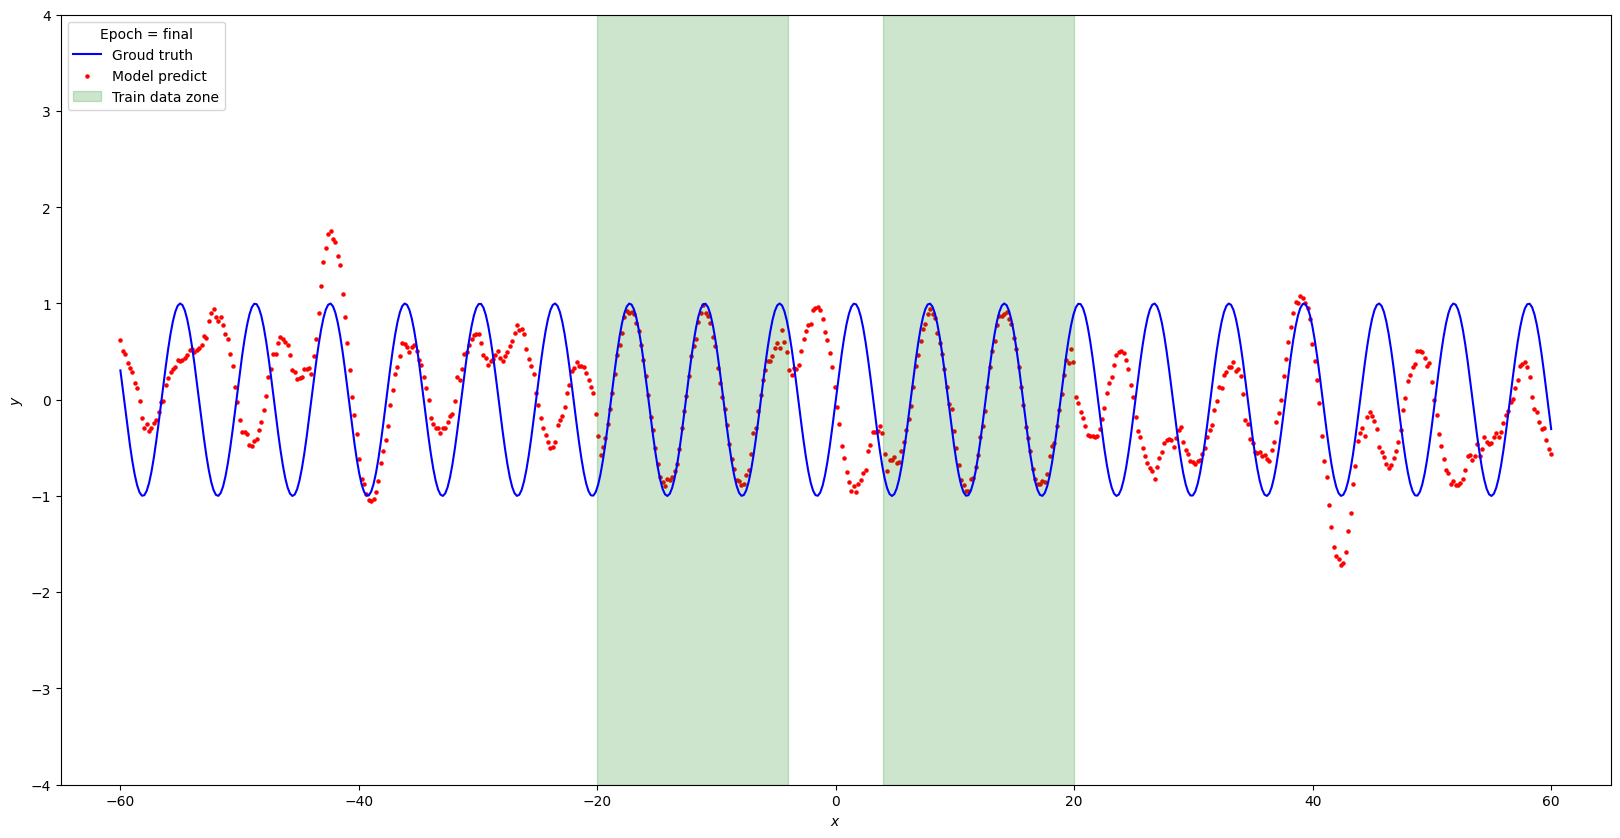

In [42]:
## Plot model
print("Best train model")
predict_plot(nnet_sin_besttrain, data)

best MSE train 0.01102
best MSE val   0.47695


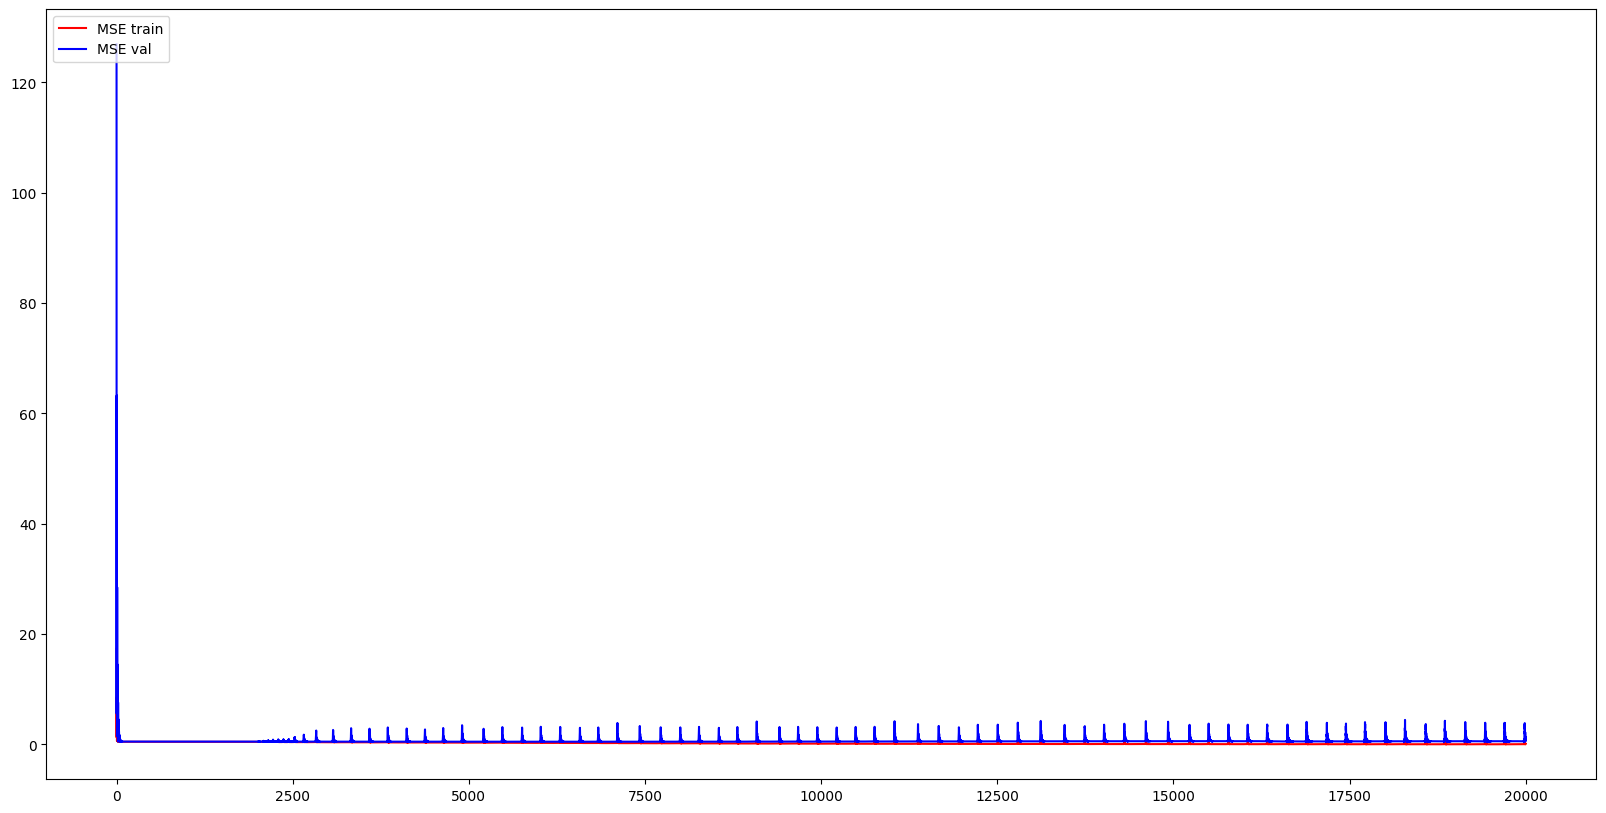

In [43]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=sin(x) ANOTHER PARAM reduce neuron

best_epoch_val   14999
best_epoch_train 14999


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


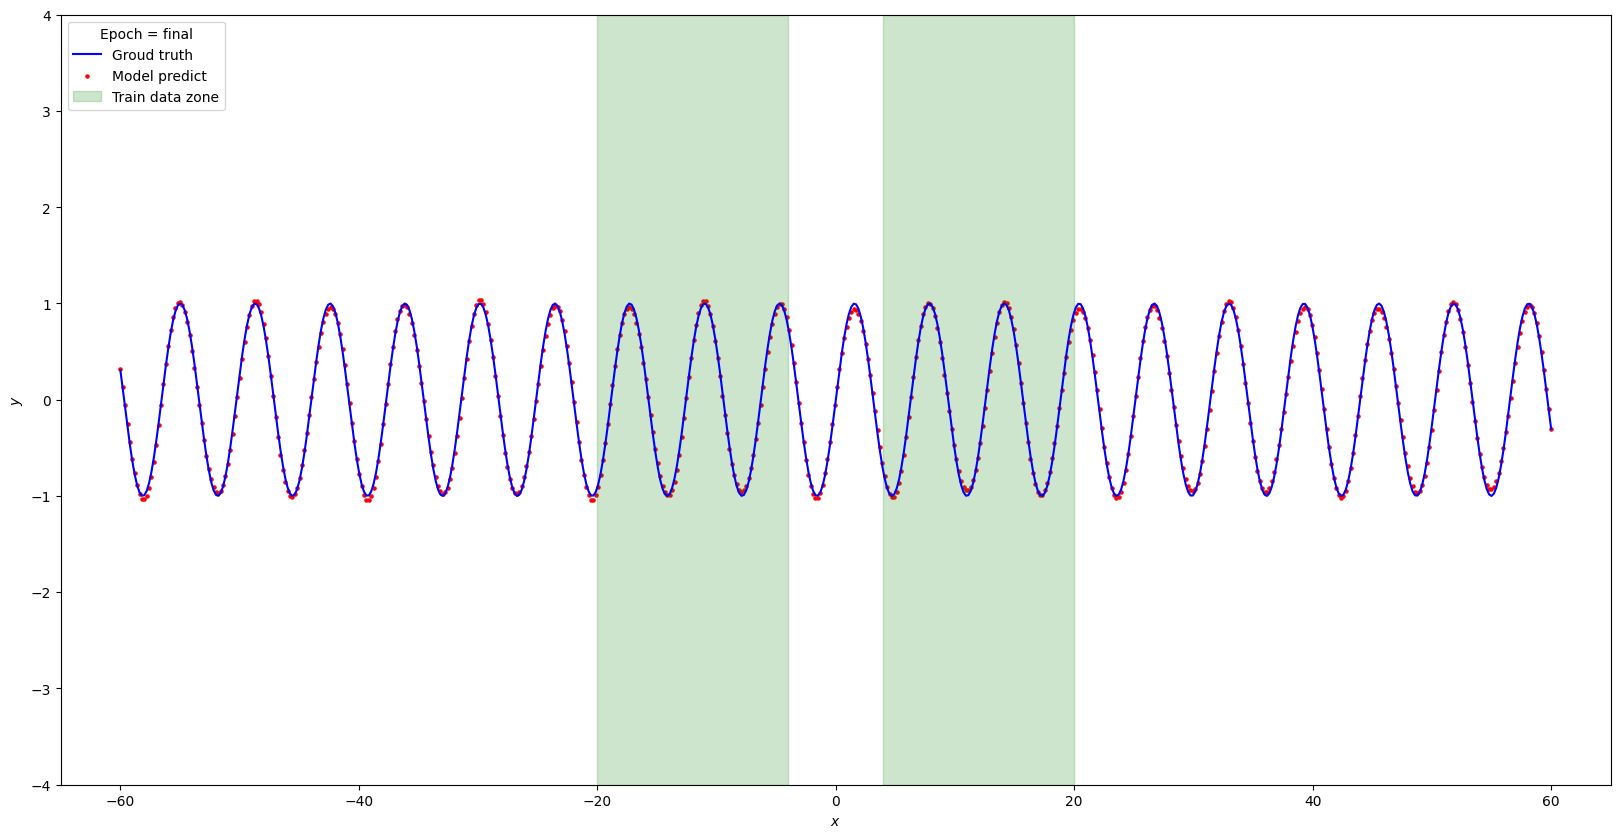

In [47]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=sin_data

# 02 Neural net for train
n_hidden_neurons=4
alpha=2
n_net = SnakeNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=15000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/002_sin_func_snake_4hidden_15000epch_lr0001/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.0001

# TRAIN RUN
nnet_sin_bestval, nnet_sin_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_sin_bestval, data)

Best train model


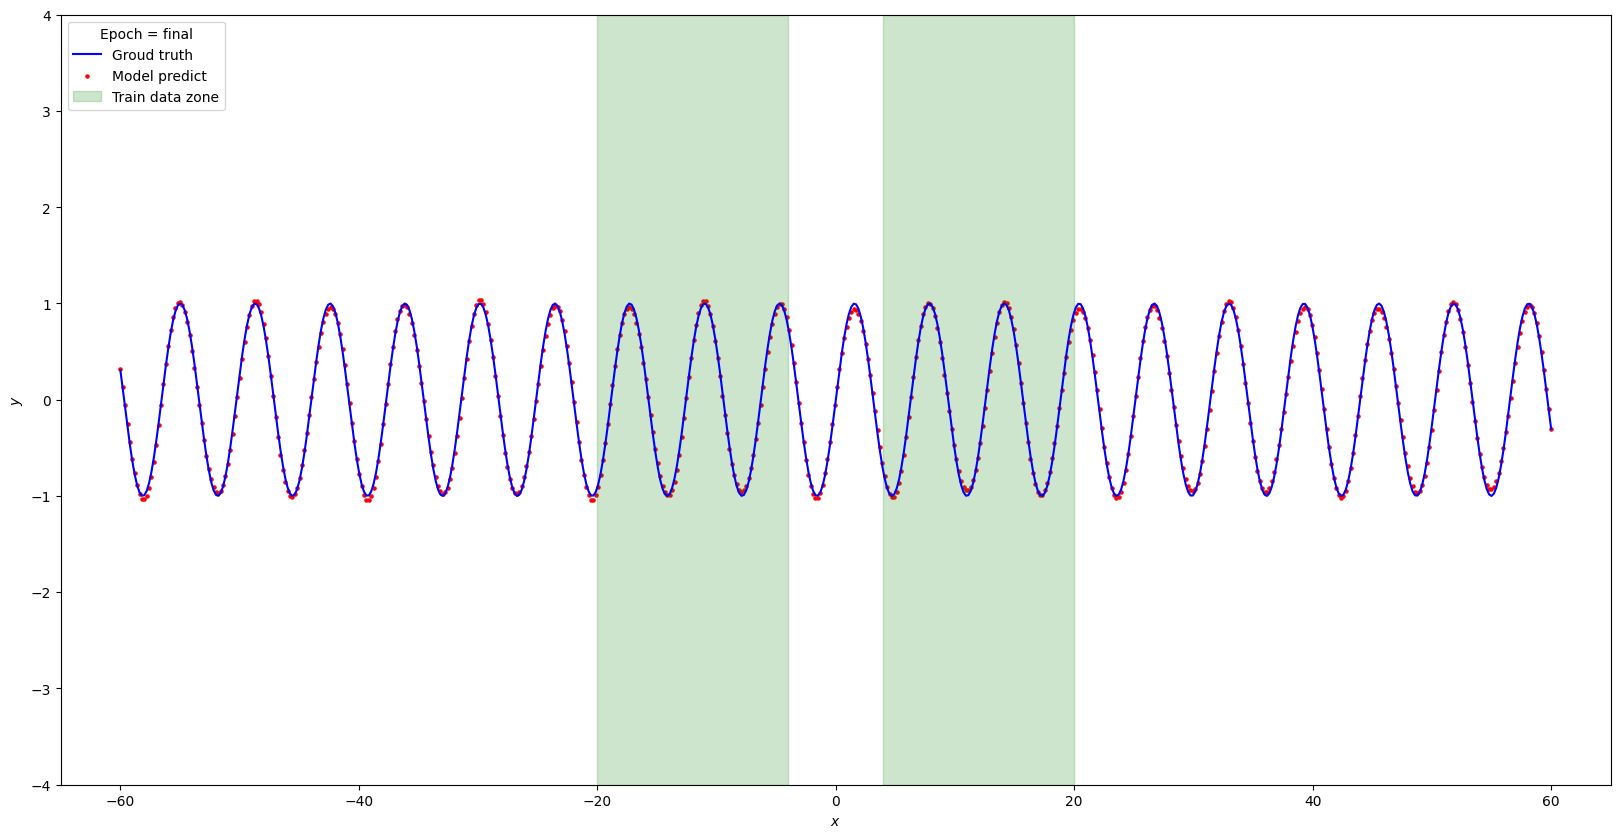

In [48]:
print("Best train model")
predict_plot(nnet_sin_besttrain, data)

best MSE train 0.00098
best MSE val   0.0011


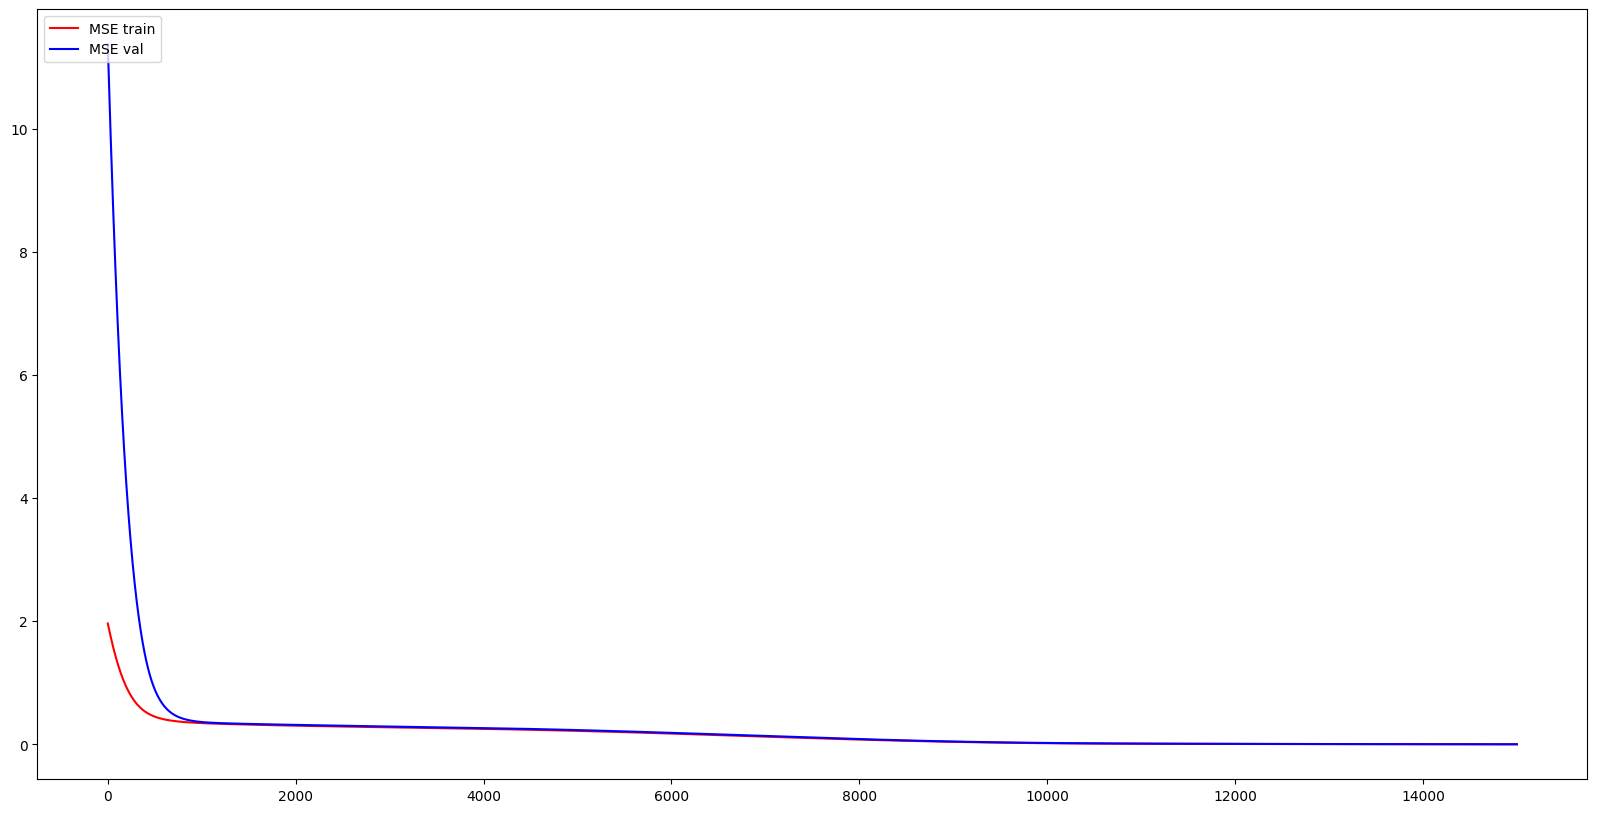

In [49]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=tanh(x) + snake activation + snake activation

best_epoch_val   5366
best_epoch_train 19940


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


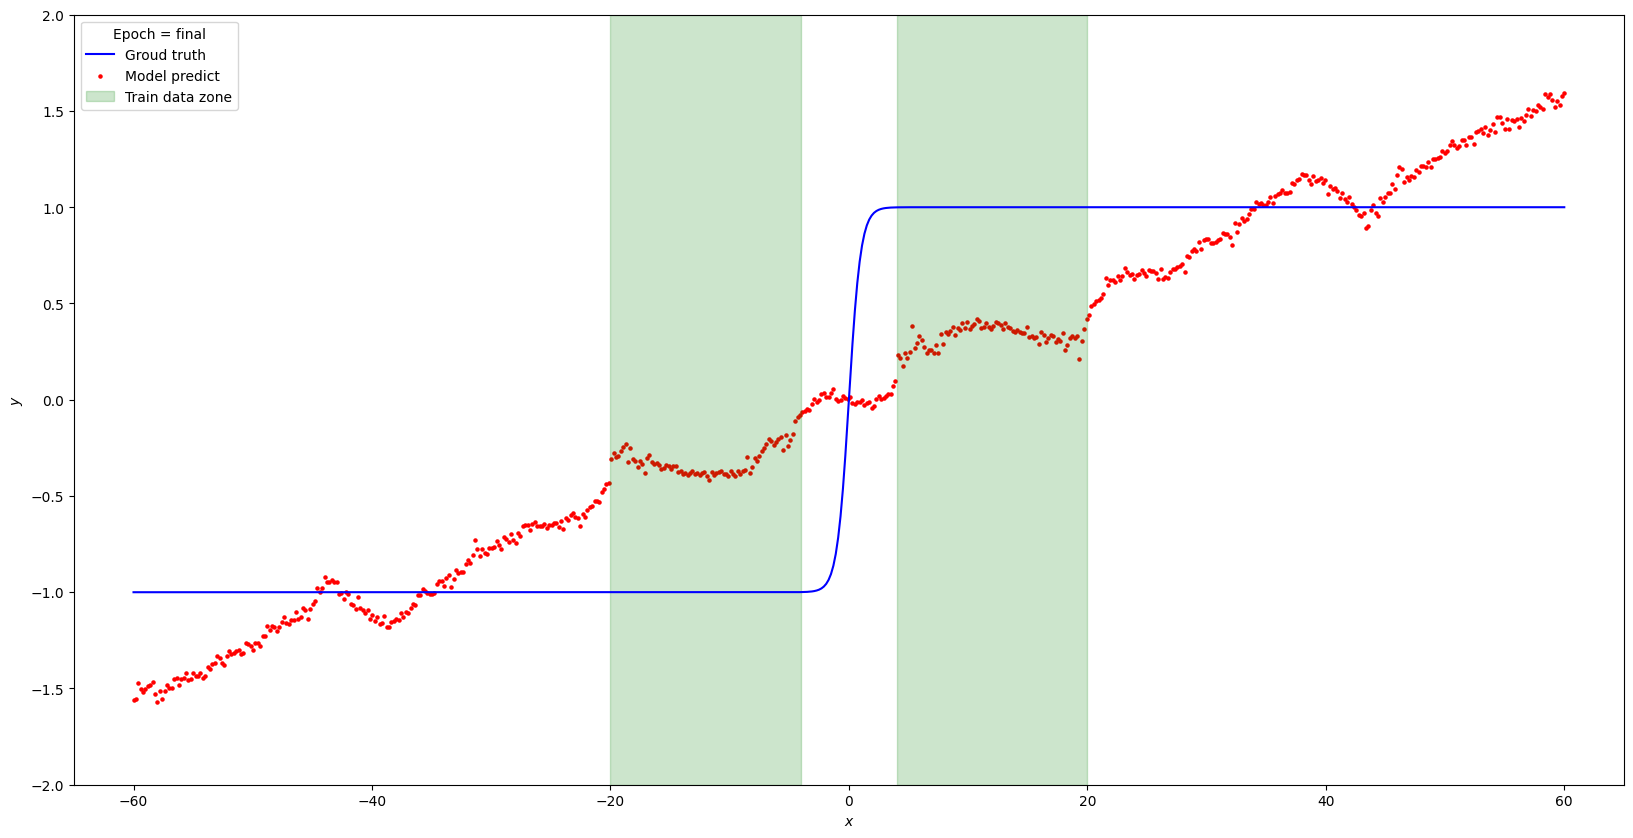

In [50]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)


# 01 class wrapped data
data=tanh_data

# 02 Neural net for train
n_hidden_neurons=512
alpha=20
n_net = SnakeNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=20000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/003_tanh_func_snake/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.001


# TRAIN RUN
nnet_tanh_bestval, nnet_tanh_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_tanh_bestval, data)

Best train model


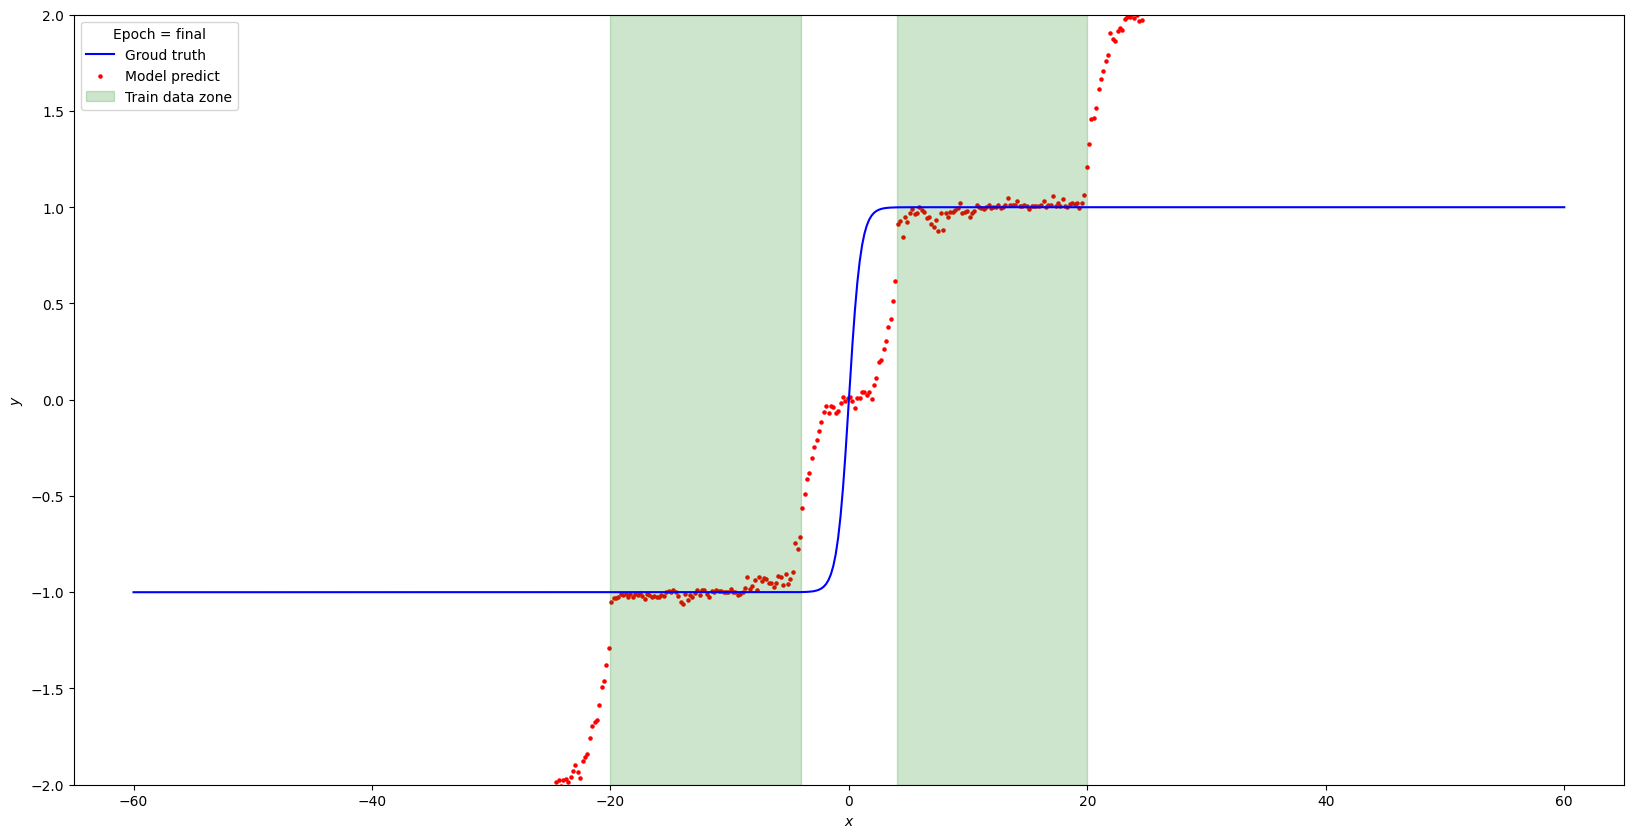

In [51]:
## Plot model
print("Best train model")
predict_plot(nnet_tanh_besttrain, data)

best MSE train 0.00091
best MSE val   0.233


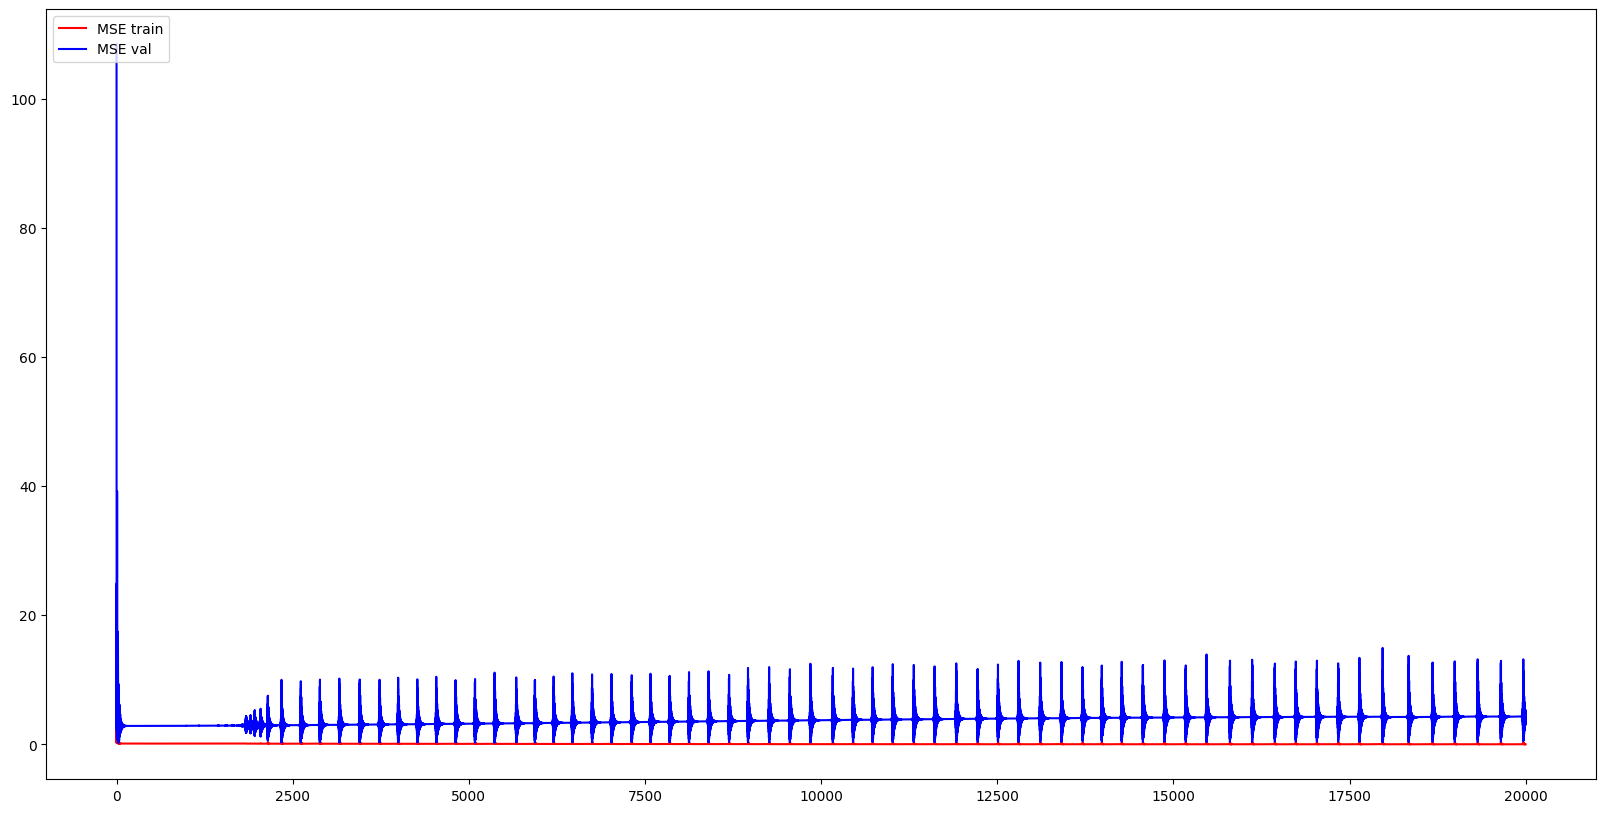

In [52]:
## Plot metric
plot_MSE(dict_mse)

## Train on data y=(x)^2 + snake activation + snake activation

best_epoch_val   3872
best_epoch_train 3999


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


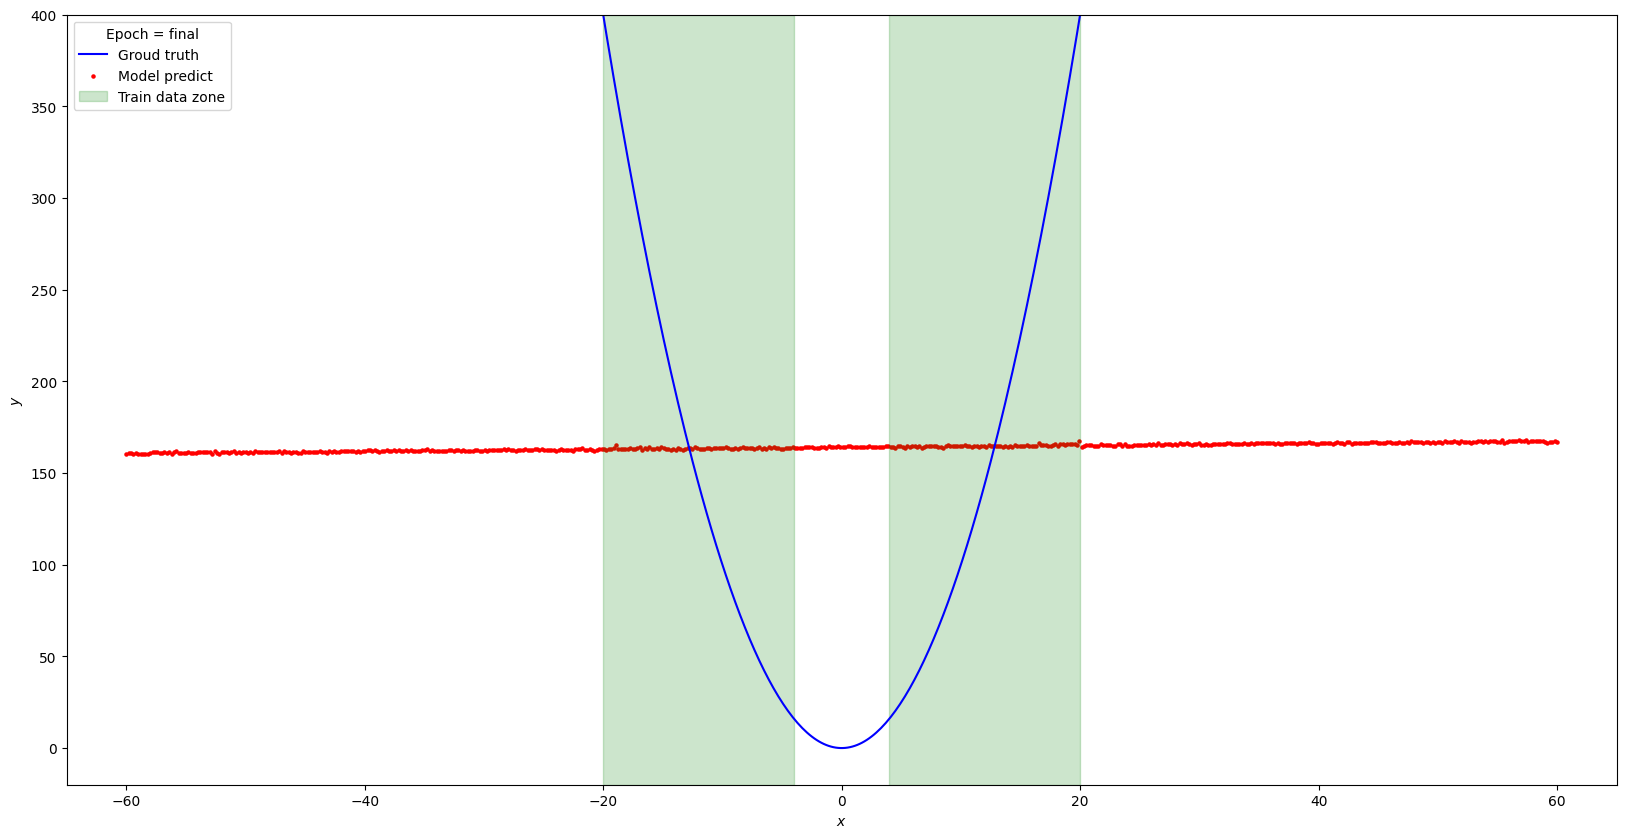

In [54]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=parb_data

# 02 Neural net for train
n_hidden_neurons=512
alpha=20
n_net = SnakeNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=4000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/004_parab_func_snake_512hiden/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.001


# TRAIN RUN
nnet_parb_bestval, nnet_parb_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_parb_bestval, data)

## Especial net

In [55]:
import torch.nn as nn
# from activations_snake import Snake


class SnakeReluNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons,alpha):
        super().__init__()
        # YOUR CODE HERE
        self.fc1 = nn.Linear(1, n_hidden_neurons)
        self.act_snake = Snake(n_hidden_neurons, alpha) 
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act_relu = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, 1)
        pass

    def forward(self, x):
        x = self.fc1(x)
        x = self.act_snake(x)
        x = self.fc2(x)
        x = self.act_relu(x)
        x = self.fc3(x)
        return x

    
def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

best_epoch_val   2991
best_epoch_train 2972
Best val model


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


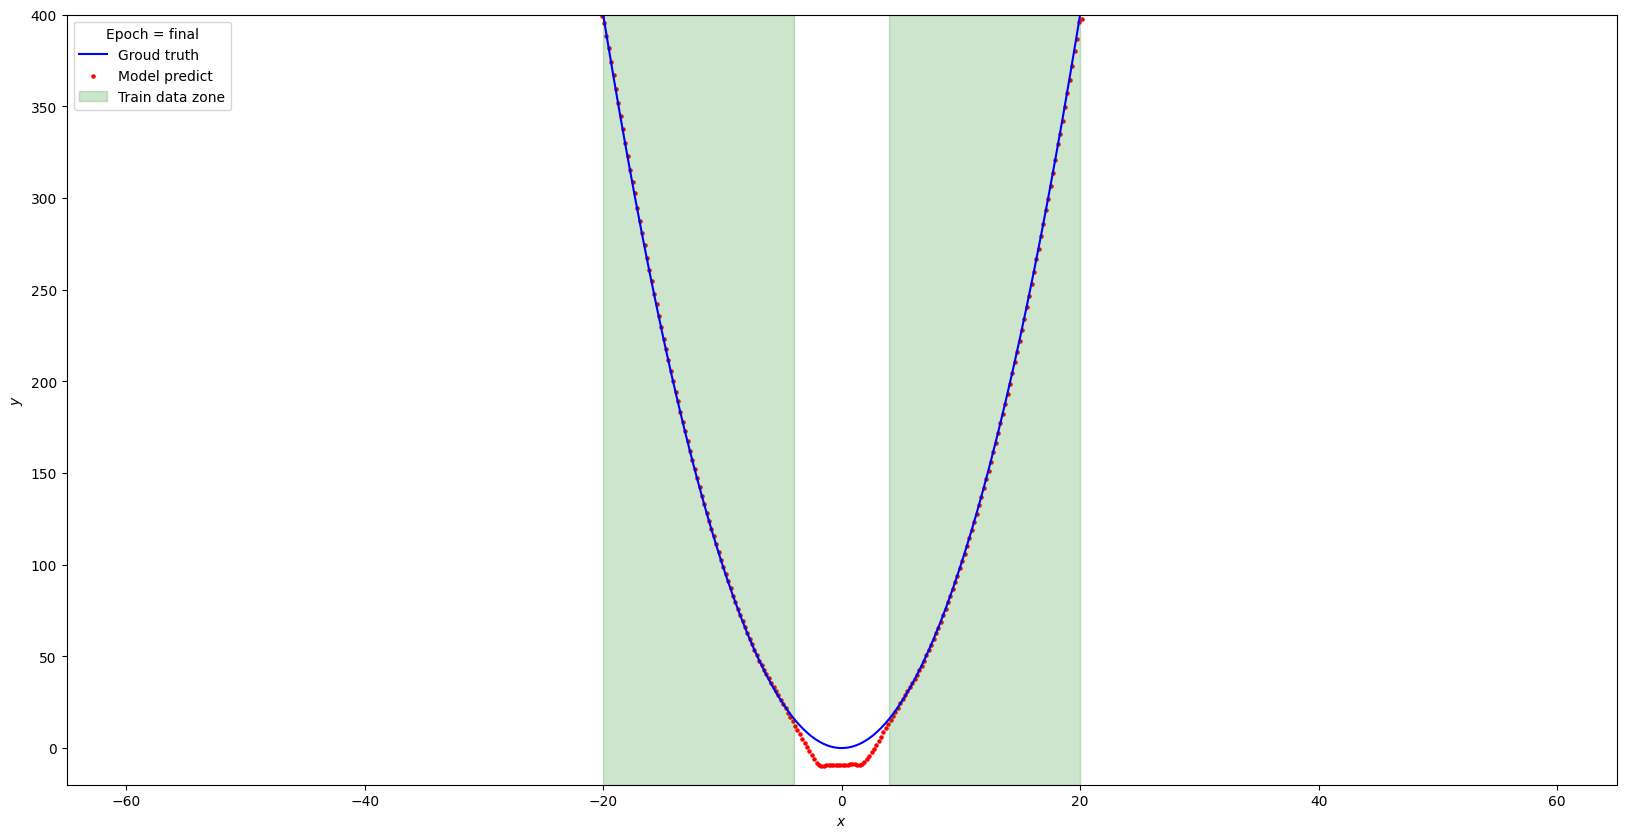

In [57]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=parb_data

# 02 Neural net for train
n_hidden_neurons=512
alpha=20
n_net = SnakeReluNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=3000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/004_parab_func_snake+relu/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.001


# TRAIN RUN
nnet_parb_bestval, nnet_parb_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_parb_bestval, data)

best_epoch_val   9906
best_epoch_train 9999


OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Best val model


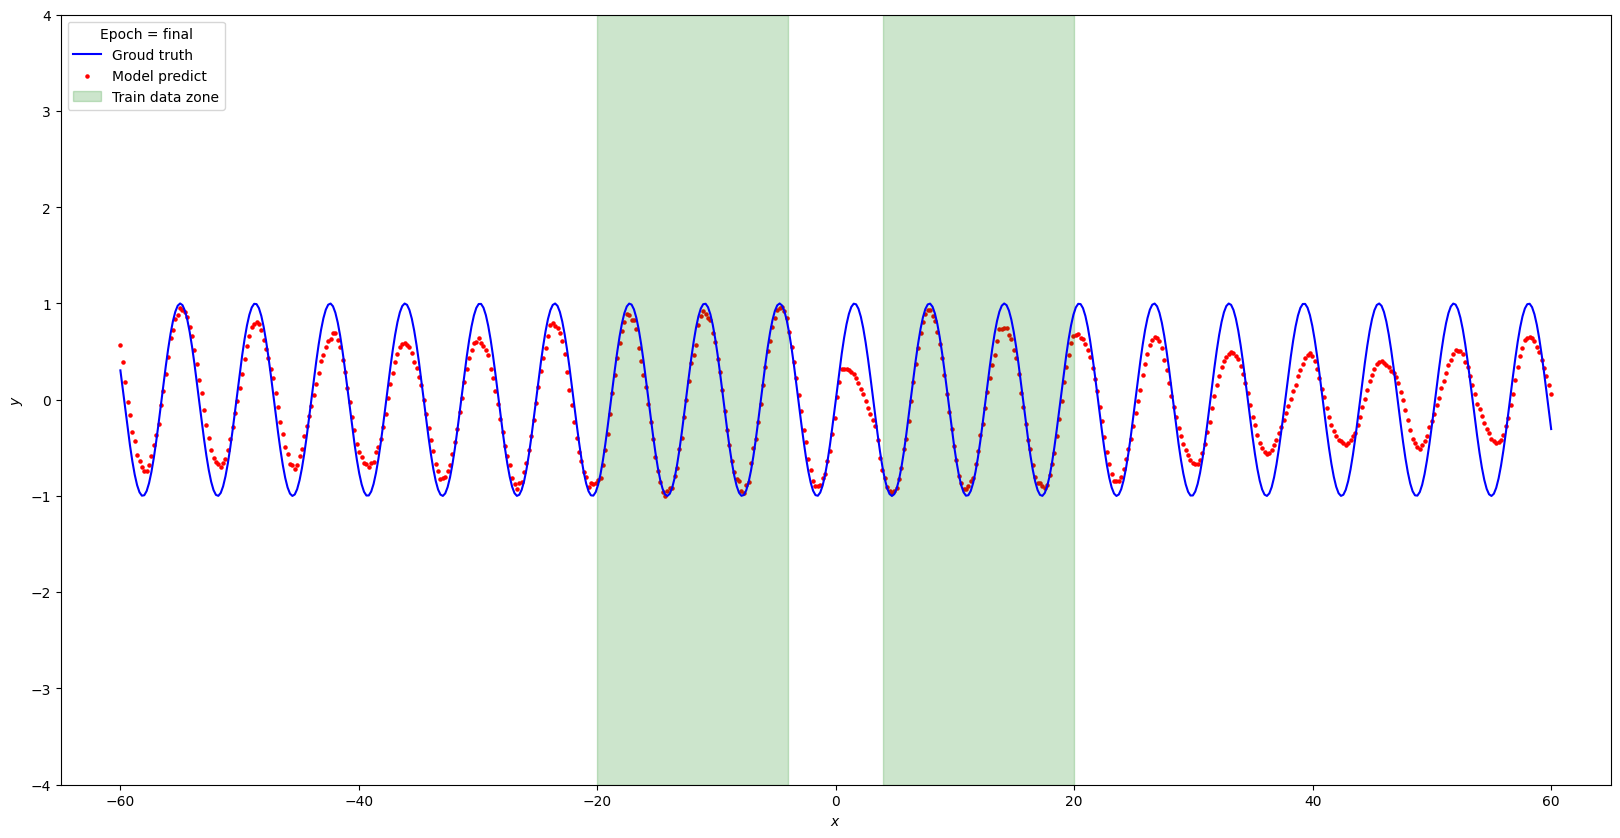

In [58]:
## Train model
torch.manual_seed(123456789)
torch.cuda.manual_seed(123456789)
np.random.seed(123456789)
random.seed(123456789)

# 01 class wrapped data
data=sin_data

# 02 Neural net for train
n_hidden_neurons=512
alpha=20
n_net = SnakeReluNet(n_hidden_neurons, alpha)

# 03 Amount of epoch
epochs=10000

# 04 Path for saving graph_data
path_save="/Users/kit/Documents/syncthing/obsidian/coding/Articles/NN_periodical/graph/002_sin_func_snake+relu/"

# 05 How often write image-graph to file 
freq=500

# 06 Learning rate
lr= 0.001


# TRAIN RUN
nnet_parb_bestval, nnet_parb_besttrain, dict_mse =train(data, n_net, epochs, path_save, freq, lr)

## Plot model
print("Best val model")
predict_plot(nnet_parb_bestval, data)